## Telecom Churn Case Study

### Business problem overview:

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. 
Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
For many incumbent operators, retaining high profitable customers is the number one business goal.
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, we are going to analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

#### Definition of Churn:
There are various ways to define churn, such as:

Revenue-based churn : Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time.

Usage-based churn:Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we are going to use the usage-based definition to define churn.

#### High- value Churn:
In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

In this project, we are going to predict churn only on high-value customers.

#### Business objective and data understanding:

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively. 

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

In [1]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\anime\anaconda3\lib\site-packages (0.7.0)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

### Reading and understanding the data

#### Reading the input file to feel the data


In [3]:
telecom_churn = pd.read_csv("telecom_churn_data.csv")
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,...,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,...,154.0,25.0,NaN,NaN,1.0,2.0,NaN,NaN,0.0,0.0,NaN,NaN,154.0,50.0,NaN,0.00,108.07,365.47,0.0,0.00,0.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,28.61,7.60,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.0,0.00,0.00,38.49,0.0,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.0,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,...,NaN,NaN,46.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,46.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,8.42,NaN,NaN,NaN,2.84,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,71.68,113.54,0.0,54.86,44.38,0.00,0.0,28.09,39.04,0.00,73.68,34.81,10.61,15.49,107.43,83.21,22.46,65.46,1.91,0.65,4.91,2.06,0.0,0.00,0.00,0.00,183.03,118.68,37.99,83.03,26.23,14.89,289.58,226.21,2.99,1.73,6.53,9.99,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,

In [4]:
telecom_churn.shape

(99999, 226)

#### Checking for missing value

In [5]:
((telecom_churn.isnull().sum()/telecom_churn.shape[0])*100).round(2)

mobile_number     0.00
circle_id         0.00
loc_og_t2o_mou    1.02
std_og_t2o_mou    1.02
loc_ic_t2o_mou    1.02
                  ... 
aon               0.00
aug_vbc_3g        0.00
jul_vbc_3g        0.00
jun_vbc_3g        0.00
sep_vbc_3g        0.00
Length: 226, dtype: float64

In [6]:
#total NAN values in the dataset
telecom_churn.isnull().values.sum()

3594931

#### There are few NAN values. lets see column wise NaN count

In [7]:
column_NaN_Count = ((telecom_churn.isnull().sum()/telecom_churn.shape[0])*100).round(2).sort_values(ascending=True) 
column_NaN_Count

mobile_number                0.00
last_day_rch_amt_9           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_7           0.00
last_day_rch_amt_6           0.00
                            ...  
max_rech_data_6             74.85
av_rech_amt_data_6          74.85
count_rech_3g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_2g_6             74.85
Length: 226, dtype: float64

#### Imputation of Null value of columns related to recharge
We are going to replace Null Values of recharge columns with '0' as recharge has importance of filtering high value customers.

In [8]:
def nullValueCheck():
    for i in range(6,10):
        print('% of null value in column total_rech_data_'+str(i)+' ===>', ((telecom_churn['total_rech_data_'+str(i)].isnull().sum()/telecom_churn.shape[0])*100).round(2))
        print('% of null value in column max_rech_data_'+str(i)+'  ===>', ((telecom_churn['max_rech_data_'+str(i)].isnull().sum()/telecom_churn.shape[0])*100).round(2))
        print('% of null value in column av_rech_amt_data_ '+str(i)+' ===>', ((telecom_churn['av_rech_amt_data_'+str(i)].isnull().sum()/telecom_churn.shape[0])*100).round(2))
        print('% of null value in column count_rech_2g_'+str(i)+'  ===>', ((telecom_churn['count_rech_2g_'+str(i)].isnull().sum()/telecom_churn.shape[0])*100).round(2))
        print('% of null value in column count_rech_3g_'+str(i)+'  ===>', ((telecom_churn['count_rech_3g_'+str(i)].isnull().sum()/telecom_churn.shape[0])*100).round(2))

In [9]:
nullValueCheck()

% of null value in column total_rech_data_6 ===> 74.85
% of null value in column max_rech_data_6  ===> 74.85
% of null value in column av_rech_amt_data_ 6 ===> 74.85
% of null value in column count_rech_2g_6  ===> 74.85
% of null value in column count_rech_3g_6  ===> 74.85
% of null value in column total_rech_data_7 ===> 74.43
% of null value in column max_rech_data_7  ===> 74.43
% of null value in column av_rech_amt_data_ 7 ===> 74.43
% of null value in column count_rech_2g_7  ===> 74.43
% of null value in column count_rech_3g_7  ===> 74.43
% of null value in column total_rech_data_8 ===> 73.66
% of null value in column max_rech_data_8  ===> 73.66
% of null value in column av_rech_amt_data_ 8 ===> 73.66
% of null value in column count_rech_2g_8  ===> 73.66
% of null value in column count_rech_3g_8  ===> 73.66
% of null value in column total_rech_data_9 ===> 74.08
% of null value in column max_rech_data_9  ===> 74.08
% of null value in column av_rech_amt_data_ 9 ===> 74.08
% of null va

In [10]:
def nullValueImpute():
    for i in range(6,10):
        telecom_churn['total_rech_data_'+str(i)] = telecom_churn['total_rech_data_'+str(i)].fillna(value = 0)
        telecom_churn['max_rech_data_'+str(i)] = telecom_churn['max_rech_data_'+str(i)].fillna(value = 0)
        telecom_churn['av_rech_amt_data_'+str(i)] = telecom_churn['av_rech_amt_data_'+str(i)].fillna(value = 0)
        telecom_churn['count_rech_2g_'+str(i)] = telecom_churn['count_rech_2g_'+str(i)].fillna(value = 0)
        telecom_churn['count_rech_3g_'+str(i)] = telecom_churn['count_rech_3g_'+str(i)].fillna(value = 0)

In [11]:
nullValueImpute()

In [12]:
nullValueCheck()

% of null value in column total_rech_data_6 ===> 0.0
% of null value in column max_rech_data_6  ===> 0.0
% of null value in column av_rech_amt_data_ 6 ===> 0.0
% of null value in column count_rech_2g_6  ===> 0.0
% of null value in column count_rech_3g_6  ===> 0.0
% of null value in column total_rech_data_7 ===> 0.0
% of null value in column max_rech_data_7  ===> 0.0
% of null value in column av_rech_amt_data_ 7 ===> 0.0
% of null value in column count_rech_2g_7  ===> 0.0
% of null value in column count_rech_3g_7  ===> 0.0
% of null value in column total_rech_data_8 ===> 0.0
% of null value in column max_rech_data_8  ===> 0.0
% of null value in column av_rech_amt_data_ 8 ===> 0.0
% of null value in column count_rech_2g_8  ===> 0.0
% of null value in column count_rech_3g_8  ===> 0.0
% of null value in column total_rech_data_9 ===> 0.0
% of null value in column max_rech_data_9  ===> 0.0
% of null value in column av_rech_amt_data_ 9 ===> 0.0
% of null value in column count_rech_2g_9  ===> 

In [13]:
telecom_churn.shape

(99999, 226)

In [14]:
# Let's Impute 0 for  roaming incoming and outgoing minute of usage as well.
telecom_churn['roam_ic_mou_6'] = telecom_churn['roam_ic_mou_6'].fillna(value = 0)
telecom_churn['roam_ic_mou_7'] = telecom_churn['roam_ic_mou_7'].fillna(value = 0)
telecom_churn['roam_ic_mou_8'] = telecom_churn['roam_ic_mou_8'].fillna(value = 0)
telecom_churn['roam_og_mou_6'] = telecom_churn['roam_og_mou_6'].fillna(value = 0)
telecom_churn['roam_og_mou_7'] = telecom_churn['roam_og_mou_7'].fillna(value = 0)
telecom_churn['roam_og_mou_8'] = telecom_churn['roam_og_mou_8'].fillna(value = 0)

#### Now according to the requirement we have to filter high value customers those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [15]:
# Lets check the dataset using describe() 
telecom_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,...,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,92254.000000,99999.000000,99999.000000,99999.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,133.670805,133.018098,130.302327,197.935577,197.045133,196.574803,190.337222,9.558277,6.873981,6.900761,6.343841,13.363643,9.439823,9.435597,8.555519,47.100763,46.473010,45.887806,44.584446,93.342088,91.397131,91.755128,90.463192,3.751013,3.792985,3.677991,3.655123,1.123056,1.368500,1.433821,1.232726,144.201175,141.670476,141.328209,138.709970,79.829870,83.299598,83.282673,82.342919,87.299624,90.804137,89.838390,86.276622,1.129011,1.115010,1.067792,1.042362,0.0,0.0,0.0,...,32.406314,33.113011,32.387644,0.469025,0.522855,0.531075,0.461885,0.150702,0.158982,0.167442,0.170922,48.445409,51.393440,52.027022,49.961089,51.904956,51.229937,50.170154,44.719701,121.396219,128.995847,135.410689,136.

In [16]:
# find the recharge columns.
telecom_churn.loc[:, telecom_churn.columns.str.contains('rech_amt')].columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [17]:
rech_column_list=['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','max_rech_amt_6','max_rech_amt_7','max_rech_amt_8','max_rech_amt_9']


In [18]:
telecom_churn[rech_column_list].describe(percentiles=[0.1,0.25,0.4,0.5,0.6,0.7,0.75,0.8,0.9,1])

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,107.728207,101.943889
std,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,126.902505,125.375109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,30.000000,28.000000
40%,170.000000,160.000000,162.000000,144.000000,50.000000,50.000000,50.000000,50.000000
50%,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,98.000000,61.000000
60%,290.000000,283.000000,288.000000,268.000000,110.000000,110.000000,130.000000,130.000000
70%,378.000000,370.000000,380.000000,355.000000,110.000000,120.000000,130.000000,130.000000


#### Let us find the average recharge of the first two months

In [19]:
def averageOfFirstTwoMonths(telecome_churn_data):
    global telecom_churn
    telecome_churn_data['avg_recharge_amt_6_7']=(telecome_churn_data['total_rech_amt_6']+telecome_churn_data['total_rech_amt_7'])/2
    telecome_churn_data=telecome_churn_data[telecome_churn_data['avg_recharge_amt_6_7'] >= telecome_churn_data['avg_recharge_amt_6_7'].describe(percentiles=[0.7])[5]]
    telecom_churn=telecome_churn_data                                       
    return telecom_churn.head()

In [20]:
averageOfFirstTwoMonths(telecom_churn)
print(telecom_churn.shape)

(30011, 227)


In [21]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,...,23.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,NaN,0.0,19.83,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,...,23.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.0,NaN,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN

#### Let us tag the churners and remove attributes of the churn phase
Now tag the customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

total_ic_mou_9

total_og_mou_9

vol_2g_mb_9

vol_3g_mb_9



In [22]:
telecom_churn['Churn'] = 0

In [23]:
is_churned = (telecom_churn.total_og_mou_9 == 0) & (telecom_churn.total_ic_mou_9 == 0)  & (telecom_churn.vol_2g_mb_9 == 0) & (telecom_churn.vol_3g_mb_9 == 0)

In [24]:
telecom_churn.loc[is_churned, 'Churn'] = 1
telecom_churn['Churn'].value_counts()

0    27418
1     2593
Name: Churn, dtype: int64

In [25]:
churn_status = round((telecom_churn['Churn'].value_counts()/telecom_churn['Churn'].value_counts().sum())*100,2)
churn_status

0    91.36
1     8.64
Name: Churn, dtype: float64

In [26]:
telecom_churn['churn_status_plot'] = telecom_churn['Churn'].apply(lambda x: 'Not Churn' if x==0 else 'Churn')

In [27]:
df = round(100*(telecom_churn.groupby('churn_status_plot').count()/telecom_churn['churn_status_plot'].count().sum()), 2)

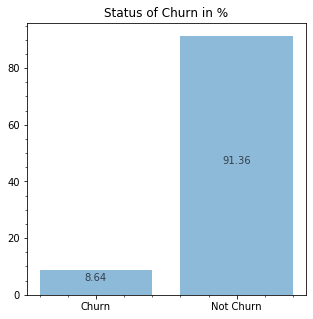

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))
rects1 = ax.bar(df['Churn'].index, df['Churn'].values, align='center', alpha=0.5)

plt.minorticks_on()
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
def autolabel(rects):
     for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .5*height,
                '%s' % float(height),
        ha='center', va='bottom')
autolabel(rects1)
plt.title('Status of Churn in %') 
plt.show()

In [29]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,Churn,churn_status_plot
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1,Churn
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,...,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,NaN,0.0,19.83,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,0,Not Churn
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.0,NaN,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,0,Not Churn
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [30]:
# Remove the churn_status_plot column as it was just for plotting
telecom_churn = telecom_churn.drop('churn_status_plot', axis = 1)

In [31]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,...,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,38.06,NaN,51.39,31.38,40.28,NaN,308.63,447.38,162.28,NaN,62.13,55.14,53.23,NaN,0.0,0.0,0.00,NaN,422.16,533.91,255.79,NaN,4.30,23.29,12.01,NaN,49.89,31.76,49.14,NaN,6.66,20.08,16.68,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,0.0,356.0,0.03,0.0,0.0,750.95,11.94,0.0,NaN,0.0,19.83,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,NaN,1.0,1.0,NaN,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,492.846,205.671,593.260,322.732,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.78,49.63,6.19,36.01,6.14,151.13,47.28,294.46,108.24,4.54,0.00,23.51,5.29,0.0,0.0,0.49,0.0,205.31,53.48,353.99,119.69,446.41,85.98,498.23,230.38,255.36,52.94,156.94,96.01,0.00,0.00,0.00,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.0,NaN,NaN,0.00,NaN,NaN,NaN,0.2,NaN,NaN,NaN,0.0,NaN,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,NaN,NaN,1.0,NaN,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,430.975,299.869,187.894,206.490,50.51,74.01,70.61,31.34,296.29,229.74,162.76,224.39,0.00,2.83,0.00,0.00,0.00,17.74,0.00,0.00,42.61,65.16,67.38,26.88,273.29,145.99,128.28,201.49,0.00,4.48,10.26,4.66,0.0,0.0,0.00,0.0,315.91,215.64,205.93,233.04,7.89,2.58,3.23,4.46,22.99,64.51,18.29,13.79,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0

#### As we have tag the data as churn and non churn, now we are going to remove  all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [32]:
columns_to_be_removed=telecom_churn.columns[telecom_churn.columns.str.contains('_9')]
telecom_churn.drop(columns_to_be_removed,axis=1,inplace=True)

In [33]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,Churn
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,...,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,...,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,0.0,2.0,3.0,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,...,7/22/2014,8/30/2014,110,50,0,NaN,NaN,8/30/2014,0.0,0.0,3.0,0.0,0.0,23.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0,0.0,0.02,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.2,NaN,NaN,0.0,0,0,0,0,0,3,0,0,0,0,0,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,...,7/31/2014,8/14/2014,100,100,130,NaN,NaN,

#### From above table we can see that there are two redudant columns. one is av_rech_amt_data_X and another is total_rech_data_X.We can merge these two columns into one column and remove the redundant columns

In [34]:
telecom_churn['total_rech_for_data_6'] = telecom_churn['av_rech_amt_data_6'] * telecom_churn['total_rech_data_6']
telecom_churn['total_rech_for_data_7'] = telecom_churn['av_rech_amt_data_7'] * telecom_churn['total_rech_data_7']
telecom_churn['total_rech_for_data_8'] = telecom_churn['av_rech_amt_data_8'] * telecom_churn['total_rech_data_8']

telecom_churn.drop(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_rech_data_6',
                       'total_rech_data_7', 'total_rech_data_8'], axis = 1, inplace = True)

In [35]:
telecom_churn.shape

(30011, 171)

#### Let us see how many and which other columns columns have missing values for than 50%

In [36]:
missing_value_columns = round(100*(telecom_churn.isnull().sum()/telecom_churn.shape[0]),2)
missing_value_columns = missing_value_columns[missing_value_columns > 50].index
len(missing_value_columns)

15

In [37]:
missing_value_columns = round(100*(telecom_churn.isnull().sum()/telecom_churn.shape[0]),2)
missing_value_columns[missing_value_columns > 50]

date_of_last_rech_data_6    62.02
date_of_last_rech_data_7    61.14
date_of_last_rech_data_8    60.83
arpu_3g_6                   62.02
arpu_3g_7                   61.14
arpu_3g_8                   60.83
arpu_2g_6                   62.02
arpu_2g_7                   61.14
arpu_2g_8                   60.83
night_pck_user_6            62.02
night_pck_user_7            61.14
night_pck_user_8            60.83
fb_user_6                   62.02
fb_user_7                   61.14
fb_user_8                   60.83
dtype: float64

In [38]:
telecom_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,...,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_recharge_amt_6_7,Churn,total_rech_for_data_6,total_rech_for_data_7,total_rech_for_data_8
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,...,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,0.0,1185.0,1,0.0,0.0,0.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,...,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,NaN,7/31/2014,8/23/2014,0.0,154.0,23.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,122.16,0.0,519.0,0,0.0,354.0,207.0
13,7002191713,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,...,110,130,6/20/2014,7/22/2014,8/30/2014,110,50,0,NaN,NaN,8/30/2014,0.0,0.0,23.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.00,0.00,NaN,NaN,0.00,NaN,NaN,0.2,NaN,NaN,0.0,0,0,0,0,0,3,0,0,0,0,0,0,NaN,NaN,1.0,2607,0.00,0.00,0.00,0.0,380.0,0,0.0,0.0,207.0
16,7000875565,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.0,0.0,30.89,67.09,21.53,0.0,0.00,0.00,0.00,3.26,5.91,0.00,...,110,130,6/30/20

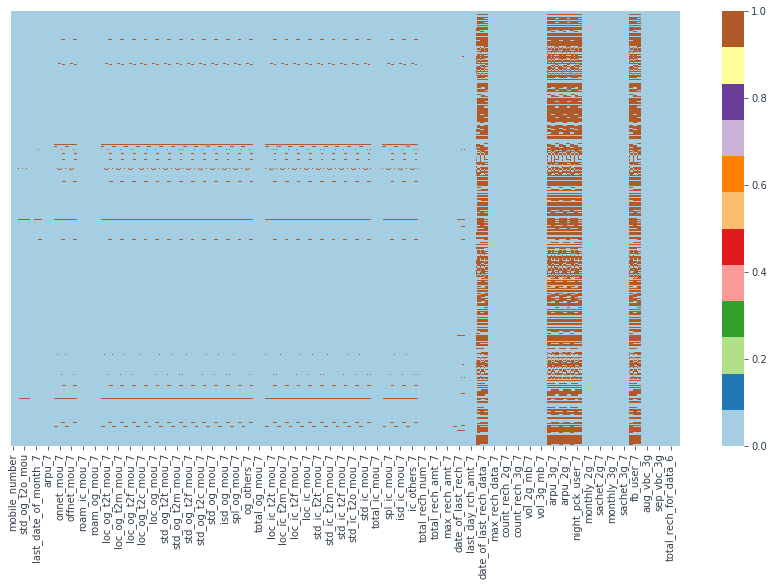

In [39]:
plt.figure(figsize=(15,8))
sns.heatmap(telecom_churn.isnull(), yticklabels=False, cmap='Paired')
plt.show()

### Exploratory Data Analysis

### Feature analysis based on Churn and Non Churn customers.

Lets create two columns for churn and non churn customers

In [40]:
churn_telecom_data = telecom_churn[telecom_churn['Churn'] == 1]
nonchurn_telecom_data = telecom_churn[telecom_churn['Churn'] == 0]

In [41]:
from IPython.display import display_html

def display_table_as_HTML(*inputDataframe):
    concate_Str=''
    for df in inputDataframe:
        concate_Str += df.to_html()
        concate_Str += '\t'
    display_html(concate_Str.replace('table','table style="display:inline"'), raw=True)
    
class color:
       PURPLE = '\033[95m'
       CYAN = '\033[96m'
       DARKCYAN = '\033[36m'
       BLUE = '\033[94m'
       GREEN = '\033[92m'
       YELLOW = '\033[93m'
       RED = '\033[91m'
       BOLD = '\033[1m'
       UNDERLINE = '\033[4m'
       END = '\033[0m'  


In [42]:
def createPlot(data_list, title):
    plt.figure(figsize=(20,15))
    plt.subplots_adjust(hspace=1.0)

    for i in range(len(data_list)):
        plt.subplot(4,3,i+1)
        X = pd.concat([telecom_churn[data_list[i]], telecom_churn['Churn']], axis=1)
        X = pd.melt(X,id_vars="Churn",var_name="features",value_name='value')
        sns.boxplot(x="features", y="value", hue="Churn", data=X)
        plt.suptitle(title)

### Recharge vs Churn and Non Churn

In [43]:
print(color.BOLD + color.BLUE + "Recharge Analysis of Churn customers" + color.BLUE + color.BOLD)
df_max_rech_data_6=pd.DataFrame(churn_telecom_data.max_rech_data_6.describe())
df_max_rech_data_7=pd.DataFrame(churn_telecom_data.max_rech_data_7.describe())
df_max_rech_data_8=pd.DataFrame(churn_telecom_data.max_rech_data_8.describe())
display_table_as_HTML(df_max_rech_data_6,df_max_rech_data_7,df_max_rech_data_8)
print(color.BOLD + color.BLUE + "Recharge Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_max_rech_data_6=pd.DataFrame(nonchurn_telecom_data.max_rech_data_6.describe())
df_max_rech_data_7=pd.DataFrame(nonchurn_telecom_data.max_rech_data_7.describe())
df_max_rech_data_8=pd.DataFrame(nonchurn_telecom_data.max_rech_data_8.describe())
display_table_as_HTML(df_max_rech_data_6,df_max_rech_data_7,df_max_rech_data_8)

Recharge Analysis of Churn customers


,max_rech_data_6
count,2593.000000
mean,41.996143
std,109.313949
min,0.000000
25%,0.000000
50%,0.000000
75%,23.000000
max,1555.000000
,max_rech_data_7
count,2593.000000


Recharge Analysis of Non Churn customers


,max_rech_data_6
count,27418.000000
mean,58.320082
std,105.367200
min,0.000000
25%,0.000000
50%,0.000000
75%,98.000000
max,1555.000000
,max_rech_data_7
count,27418.000000


### 2G and 3G Recharge vs Churn and Non Churn

In [44]:
print(color.BOLD + color.BLUE + "2G Recharge Analysis of Churn customers" + color.BLUE + color.BOLD)
df_vol_2g_mb_6=pd.DataFrame(churn_telecom_data.vol_2g_mb_6.describe())
df_vol_2g_mb_7=pd.DataFrame(churn_telecom_data.vol_2g_mb_7.describe())
df_vol_2g_mb_8=pd.DataFrame(churn_telecom_data.vol_2g_mb_8.describe())
display_table_as_HTML(df_vol_2g_mb_6,df_vol_2g_mb_7,df_vol_2g_mb_8)
print(color.BOLD + color.BLUE + "2G Recharge Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_vol_2g_mb_6=pd.DataFrame(nonchurn_telecom_data.vol_2g_mb_6.describe())
df_vol_2g_mb_7=pd.DataFrame(nonchurn_telecom_data.vol_2g_mb_7.describe())
df_vol_2g_mb_8=pd.DataFrame(nonchurn_telecom_data.vol_2g_mb_8.describe())
display_table_as_HTML(df_vol_2g_mb_6,df_vol_2g_mb_7,df_vol_2g_mb_8)
print(color.BOLD + color.GREEN + "3G Recharge Analysis of Churn customers" + color.BLUE + color.GREEN)
df_vol_3g_mb_6=pd.DataFrame(churn_telecom_data.vol_3g_mb_6.describe())
df_vol_3g_mb_7=pd.DataFrame(churn_telecom_data.vol_3g_mb_8.describe())
df_vol_3g_mb_8=pd.DataFrame(churn_telecom_data.vol_3g_mb_8.describe())
display_table_as_HTML(df_vol_3g_mb_6,df_vol_3g_mb_7,df_vol_3g_mb_8)
print(color.BOLD + color.GREEN + "3G Recharge Analysis of Non Churn customers" + color.BLUE + color.GREEN)
df_vol_3g_mb_6=pd.DataFrame(nonchurn_telecom_data.vol_3g_mb_6.describe())
df_vol_3g_mb_7=pd.DataFrame(nonchurn_telecom_data.vol_3g_mb_7.describe())
df_vol_3g_mb_8=pd.DataFrame(nonchurn_telecom_data.vol_3g_mb_8.describe())
display_table_as_HTML(df_vol_3g_mb_6,df_vol_3g_mb_7,df_vol_3g_mb_8)

2G Recharge Analysis of Churn customers


,vol_2g_mb_6
count,2593.000000
mean,60.775588
std,243.084276
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,4017.160000
,vol_2g_mb_7
count,2593.000000


2G Recharge Analysis of Non Churn customers


,vol_2g_mb_6
count,27418.000000
mean,80.569210
std,280.420463
min,0.000000
25%,0.000000
50%,0.000000
75%,16.937500
max,10285.900000
,vol_2g_mb_7
count,27418.000000


3G Recharge Analysis of Churn customers


,vol_3g_mb_6
count,2593.000000
mean,188.395461
std,715.327843
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,9400.120000
,vol_3g_mb_8
count,2593.000000


3G Recharge Analysis of Non Churn customers


,vol_3g_mb_6
count,27418.000000
mean,265.012522
std,878.846885
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,45735.400000
,vol_3g_mb_7
count,27418.000000


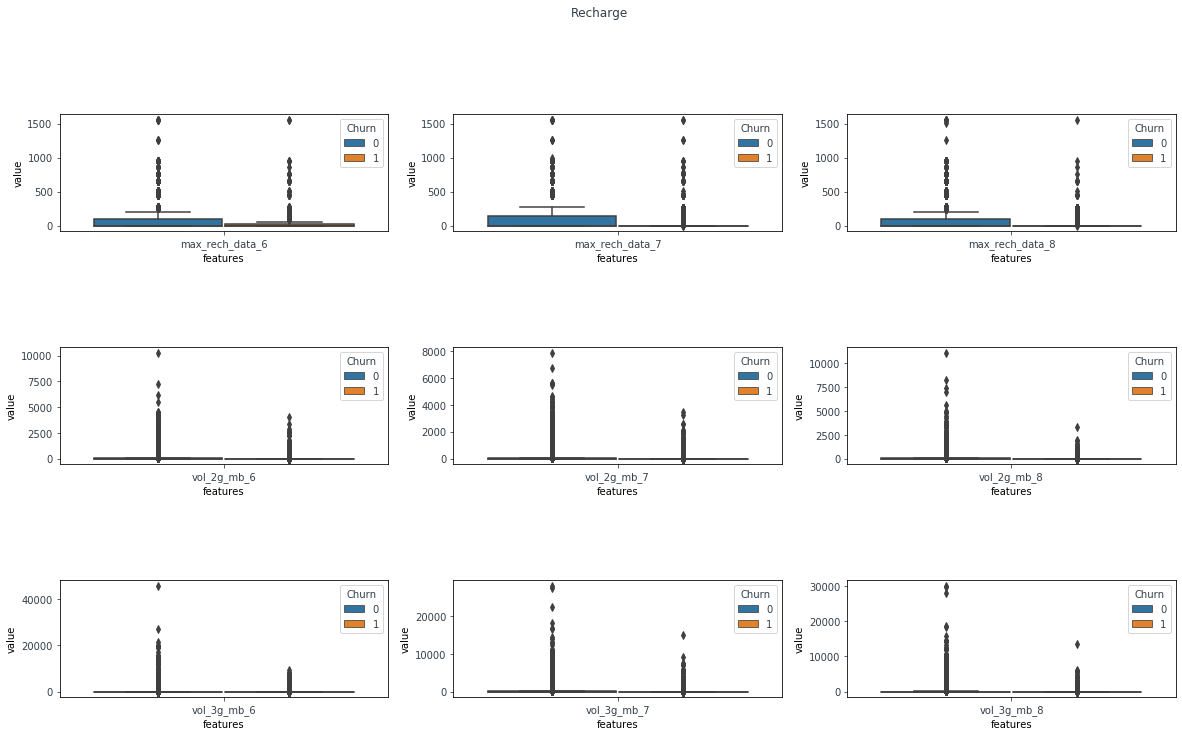

In [45]:
data_list = ['max_rech_data_6','max_rech_data_7', 'max_rech_data_8', 'vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']
createPlot(data_list,'Recharge')

#### Observation:

Max Recharge and 2G recharge has dropped for churn customers compared to non churn customers  for the month of Aug.

There are outliers in the max recharge feature.

### Night pack feature vs Churn and Non Churn

In [46]:
print(color.BOLD + color.BLUE + "Night pack recharge Analysis of Churn customers" + color.BLUE + color.BOLD)
df_night_pck_user_6=pd.DataFrame(churn_telecom_data.night_pck_user_6.describe())
df_night_pck_user_7=pd.DataFrame(churn_telecom_data.night_pck_user_7.describe())
df_night_pck_user_8=pd.DataFrame(churn_telecom_data.night_pck_user_8.describe())
display_table_as_HTML(df_night_pck_user_6,df_night_pck_user_7,df_night_pck_user_8)
print(color.BOLD + color.BLUE + "Night pack recharge Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_night_pck_user_6=pd.DataFrame(nonchurn_telecom_data.night_pck_user_6.describe())
df_night_pck_user_7=pd.DataFrame(nonchurn_telecom_data.night_pck_user_7.describe())
df_night_pck_user_8=pd.DataFrame(nonchurn_telecom_data.night_pck_user_8.describe())
display_table_as_HTML(df_night_pck_user_6,df_night_pck_user_7,df_night_pck_user_8)

Night pack recharge Analysis of Churn customers


,night_pck_user_6
count,746.000000
mean,0.036193
std,0.186895
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
,night_pck_user_7
count,636.000000


Night pack recharge Analysis of Non Churn customers


,night_pck_user_6
count,10651.000000
mean,0.026664
std,0.161107
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000
,night_pck_user_7
count,11026.000000


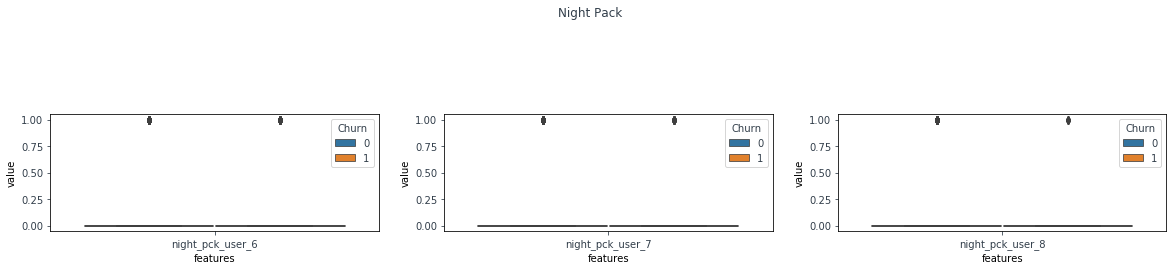

In [47]:
data_list = ['night_pck_user_6','night_pck_user_7', 'night_pck_user_8']
createPlot(data_list,'Night Pack')

#### Observation:

Night pack count has dropped in the month of aug for churn customers and increase in case of non churn customers

### Roaming Incoming and outgoing feature vs Churn and Non Churn

In [48]:
print(color.BOLD + color.BLUE + "Roaming incoming Analysis of Churn customers" + color.BLUE + color.BOLD)
df_roam_ic_mou_6=pd.DataFrame(churn_telecom_data.roam_ic_mou_6.describe())
df_roam_ic_mou_7=pd.DataFrame(churn_telecom_data.roam_ic_mou_7.describe())
df_roam_ic_mou_8=pd.DataFrame(churn_telecom_data.roam_ic_mou_8.describe())
display_table_as_HTML(df_roam_ic_mou_6,df_roam_ic_mou_7,df_roam_ic_mou_8)

print(color.BOLD + color.BLUE + "Roaming incoming Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_roam_ic_mou_6=pd.DataFrame(nonchurn_telecom_data.roam_ic_mou_6.describe())
df_roam_ic_mou_7=pd.DataFrame(nonchurn_telecom_data.roam_ic_mou_7.describe())
df_roam_ic_mou_8=pd.DataFrame(nonchurn_telecom_data.roam_ic_mou_8.describe())
display_table_as_HTML(df_roam_ic_mou_6,df_roam_ic_mou_7,df_roam_ic_mou_8)

Roaming incoming Analysis of Churn customers


,roam_ic_mou_6
count,2593.000000
mean,30.493803
std,139.414468
min,0.000000
25%,0.000000
50%,0.000000
75%,1.480000
max,2307.910000
,roam_ic_mou_7
count,2593.000000


Roaming incoming Analysis of Non Churn customers


,roam_ic_mou_6
count,27418.000000
mean,16.175652
std,70.727996
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2613.310000
,roam_ic_mou_7
count,27418.000000


In [49]:
print(color.BOLD + color.BLUE + "Roaming outgoing Analysis of Churn customers" + color.BLUE + color.BOLD)
df_roam_og_mou_6=pd.DataFrame(churn_telecom_data.roam_og_mou_6.describe())
df_roam_og_mou_7=pd.DataFrame(churn_telecom_data.roam_og_mou_7.describe())
df_roam_og_mou_8=pd.DataFrame(churn_telecom_data.roam_og_mou_8.describe())
display_table_as_HTML(df_roam_og_mou_6,df_roam_og_mou_7,df_roam_og_mou_8)

print(color.BOLD + color.BLUE + "Roaming outgoing Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_roam_og_mou_6=pd.DataFrame(nonchurn_telecom_data.roam_og_mou_6.describe())
df_roam_og_mou_7=pd.DataFrame(nonchurn_telecom_data.roam_og_mou_7.describe())
df_roam_og_mou_8=pd.DataFrame(nonchurn_telecom_data.roam_og_mou_8.describe())
display_table_as_HTML(df_roam_og_mou_6,df_roam_og_mou_7,df_roam_og_mou_8)

Roaming outgoing Analysis of Churn customers


,roam_og_mou_6
count,2593.000000
mean,54.650613
std,197.703320
min,0.000000
25%,0.000000
50%,0.000000
75%,3.780000
max,3161.790000
,roam_og_mou_7
count,2593.000000


Roaming outgoing Analysis of Non Churn customers


,roam_og_mou_6
count,27418.000000
mean,26.926214
std,107.828240
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,3775.110000
,roam_og_mou_7
count,27418.000000


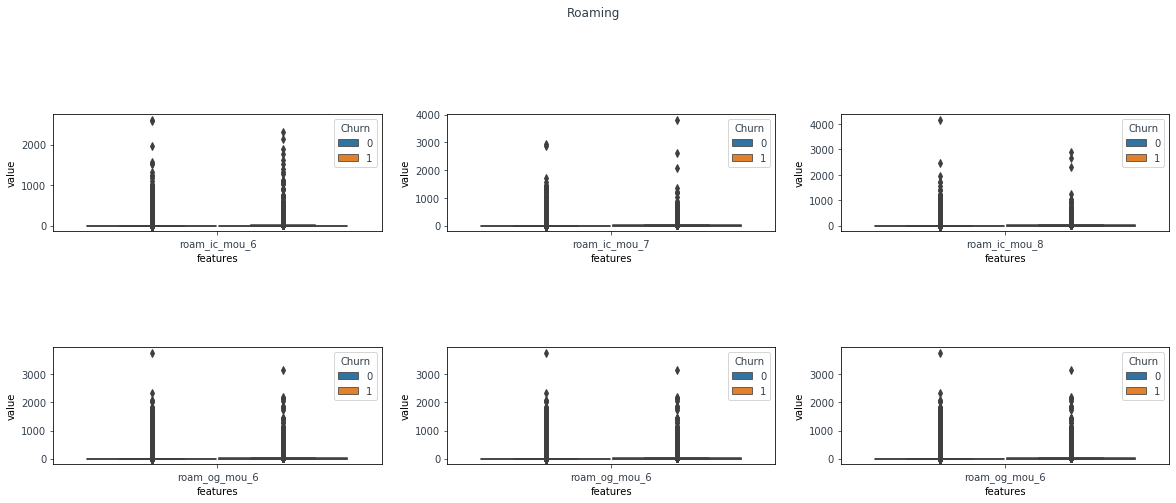

In [50]:
data_list = ['roam_ic_mou_6','roam_ic_mou_7', 'roam_ic_mou_8','roam_og_mou_6','roam_og_mou_6','roam_og_mou_6']
createPlot(data_list,'Roaming')

### Age on Network feature vs Churn and Non Churn

In [51]:
print(color.BOLD + color.BLUE + "Age on Network Analysis of Churn customers" + color.BLUE + color.BOLD)
df_aon=pd.DataFrame(churn_telecom_data.aon.describe())
display_table_as_HTML(df_aon)

print(color.BOLD + color.BLUE + "Age on Network Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_non_aon=pd.DataFrame(nonchurn_telecom_data.aon.describe())
display_table_as_HTML(df_non_aon)


Age on Network Analysis of Churn customers


,aon
count,2593.000000
mean,869.236406
std,747.643178
min,180.000000
25%,355.000000
50%,615.000000
75%,1042.000000
max,3670.000000


Age on Network Analysis of Non Churn customers


,aon
count,27418.000000
mean,1301.404844
std,985.956668
min,180.000000
25%,487.000000
50%,958.000000
75%,2014.750000
max,4321.000000


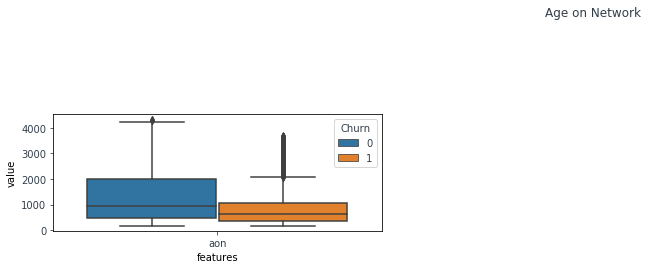

In [52]:
data_list = ['aon']
createPlot(data_list,'Age on Network')

Text(0.5, 1.0, 'Non Churn on AON')

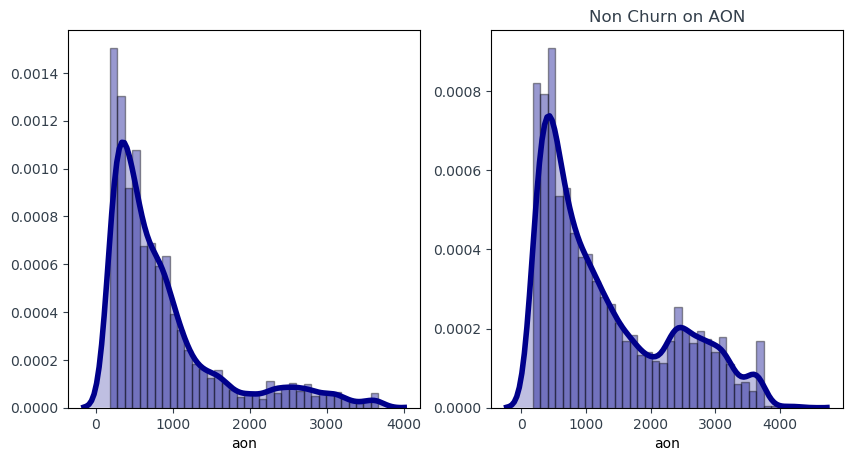

In [53]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5),dpi=100)
sns.distplot(telecom_churn.loc[telecom_churn.Churn==1,'aon'], ax=axs[0],hist=True, kde=True, 
             bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
sns.distplot(telecom_churn.loc[telecom_churn.Churn==0,'aon'], ax=axs[1],hist=True, kde=True, 
             bins=36, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 4})
plt.title('Non Churn on AON')

#### Observation

New customers are in the network has the higher chance of churn than the older customers

### ONNET users feature vs Churn and Non Churn

In [54]:
print(color.BOLD + color.BLUE + "Onnet users Analysis of Churn customers" + color.BLUE + color.BOLD)
df_onnet_mou_6=pd.DataFrame(churn_telecom_data.onnet_mou_6.describe())
df_onnet_mou_7=pd.DataFrame(churn_telecom_data.onnet_mou_7.describe())
df_onnet_mou_8=pd.DataFrame(churn_telecom_data.onnet_mou_8.describe())
display_table_as_HTML(df_onnet_mou_6,df_onnet_mou_7,df_onnet_mou_8)

print(color.BOLD + color.BLUE + "Onnet users Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_onnet_mou_6=pd.DataFrame(nonchurn_telecom_data.onnet_mou_6.describe())
df_onnet_mou_7=pd.DataFrame(nonchurn_telecom_data.onnet_mou_7.describe())
df_onnet_mou_8=pd.DataFrame(nonchurn_telecom_data.onnet_mou_8.describe())
display_table_as_HTML(df_onnet_mou_6,df_onnet_mou_7,df_onnet_mou_8)

Onnet users Analysis of Churn customers


,onnet_mou_6
count,2487.000000
mean,425.237636
std,605.082862
min,0.000000
25%,52.020000
50%,186.480000
75%,571.925000
max,7011.110000
,onnet_mou_7
count,2434.000000


Onnet users Analysis of Non Churn customers


,onnet_mou_6
count,27208.000000
mean,287.662607
std,445.106423
min,0.000000
25%,42.425000
50%,124.775000
75%,341.367500
max,7376.710000
,onnet_mou_7
count,27274.000000


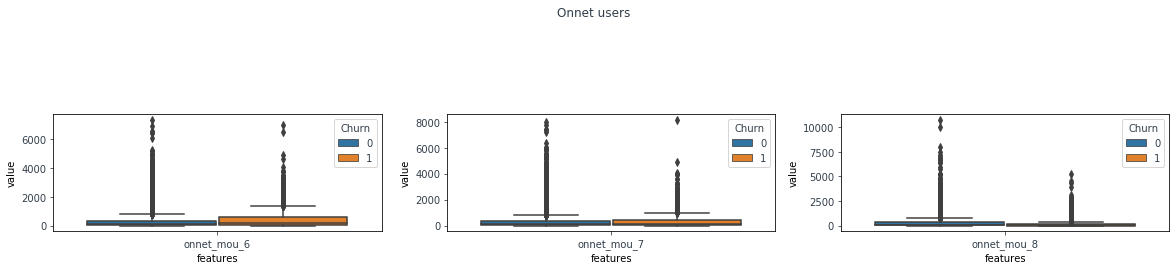

In [55]:
data_list = ['onnet_mou_6','onnet_mou_7','onnet_mou_8']
createPlot(data_list,'Onnet users')

#### Observation:

Calls within the same network (ONNET) per user has decreased gradually and its less in Aug

### ARPU users feature vs Churn and Non Churn

In [56]:
print(color.BOLD + color.BLUE + "ARPU Analysis of Churn customers" + color.BLUE + color.BOLD)
df_arpu_6=pd.DataFrame(churn_telecom_data.arpu_6.describe())
df_arpu_7=pd.DataFrame(churn_telecom_data.arpu_7.describe())
df_arpu_8=pd.DataFrame(churn_telecom_data.arpu_8.describe())
display_table_as_HTML(df_arpu_6,df_arpu_7,df_arpu_8)

print(color.BOLD + color.BLUE + "ARPU Analysis of Non Churn customers" + color.BLUE + color.BOLD)
df_arpu_6=pd.DataFrame(nonchurn_telecom_data.arpu_6.describe())
df_arpu_7=pd.DataFrame(nonchurn_telecom_data.arpu_7.describe())
df_arpu_8=pd.DataFrame(nonchurn_telecom_data.arpu_8.describe())
display_table_as_HTML(df_arpu_6,df_arpu_7,df_arpu_8)

ARPU Analysis of Churn customers


,arpu_6
count,2593.000000
mean,678.716970
std,551.792864
min,-209.465000
25%,396.507000
50%,573.396000
75%,819.460000
max,11505.508000
,arpu_7
count,2593.000000


ARPU Analysis of Non Churn customers


,arpu_6
count,27418.000000
mean,578.637360
std,429.988265
min,-2258.709000
25%,362.218000
50%,489.324000
75%,690.891750
max,27731.088000
,arpu_7
count,27418.000000


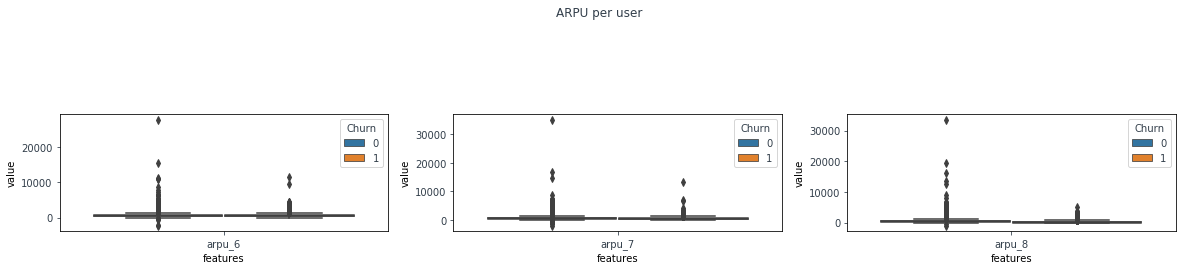

In [57]:
data_list = ['arpu_6','arpu_7','arpu_8']
createPlot(data_list,'ARPU per user')

#### Observation:

Average revenue per user has decresed from 678 to 243 on month basis

### Date feature vs Churn and Non Churn

Let us first see what are the date columns in the telecom_churn dataset

In [58]:
date_related_columns = telecom_churn.columns[telecom_churn.columns.str.contains('date')]
date_related_columns


Index(['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [59]:
# convert to datetime
for date_col in list(date_related_columns):
    telecom_churn[date_col]= pd.to_datetime(telecom_churn[date_col])

Lets us drop the columns 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8' as they do not add any value.

In [60]:
telecom_churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1,inplace=True)

Let us see which day the last recharge was done on month basis

In [61]:
telecom_churn['day_of_last_rech_6'] =  telecom_churn.date_of_last_rech_6.dt.day
telecom_churn['day_of_last_rech_7'] =  telecom_churn.date_of_last_rech_7.dt.day
telecom_churn['day_of_last_rech_8'] =  telecom_churn.date_of_last_rech_8.dt.day

cols_date_of_last_rchg = ['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8']

pd.DataFrame([telecom_churn.loc[telecom_churn.Churn==0,cols_date_of_last_rchg].median()
              ,telecom_churn.loc[telecom_churn.Churn==1,cols_date_of_last_rchg].median()],index={'Non Churned','Churned'})

,day_of_last_rech_6,day_of_last_rech_7,day_of_last_rech_8
Churned,28.0,29.0,29.0
Non Churned,29.0,28.0,26.0


In [62]:
telecom_churn['day_of_last_rech_shift'] = telecom_churn.day_of_last_rech_8 -(telecom_churn.day_of_last_rech_6+telecom_churn.day_of_last_rech_7)/2

In [63]:
#let us drop the derived columns as they are not going to be used further
telecom_churn.drop(['day_of_last_rech_6','day_of_last_rech_7','day_of_last_rech_8'],axis=1,inplace=True)

#### Let us see the day of last recharge for data

In [64]:
telecom_churn['day_of_last_rech_data_6'] =  telecom_churn.date_of_last_rech_data_6.dt.day
telecom_churn['day_of_last_rech_data_7'] =  telecom_churn.date_of_last_rech_data_7.dt.day
telecom_churn['day_of_last_rech_data_8'] =  telecom_churn.date_of_last_rech_data_8.dt.day

cols_date_of_last_rchg_data = ['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8']

pd.DataFrame([telecom_churn.loc[telecom_churn.Churn==0,cols_date_of_last_rchg_data].median()
              ,telecom_churn.loc[telecom_churn.Churn==1,cols_date_of_last_rchg_data].median()],index={'Non Churned','Churned'})

,day_of_last_rech_data_6,day_of_last_rech_data_7,day_of_last_rech_data_8
Churned,21.0,23.0,22.0
Non Churned,21.0,20.0,15.5


#### Observation:
    
We can see that for churn majority of them has stopped recharged at a very early date.

In [65]:
telecom_churn['day_of_last_rech_data_shift'] = telecom_churn.day_of_last_rech_data_8 -(telecom_churn.day_of_last_rech_data_6+telecom_churn.day_of_last_rech_data_7)/2

In [66]:
telecom_churn.drop(['day_of_last_rech_data_6','day_of_last_rech_data_7','day_of_last_rech_data_8'],axis=1,inplace=True)

In [67]:
telecom_churn.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis=1,inplace=True)
telecom_churn.drop(['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8'],axis=1,inplace=True)

### Total recharge vs Churn and Non churn

In [68]:
print(color.BOLD + color.BLUE + "Total recharge of Churn customers" + color.BLUE + color.BOLD)
df_total_rech_amt_6=pd.DataFrame(churn_telecom_data.total_rech_amt_6.describe())
df_total_rech_amt_7=pd.DataFrame(churn_telecom_data.total_rech_amt_7.describe())
df_total_rech_amt_8=pd.DataFrame(churn_telecom_data.total_rech_amt_8.describe())
display_table_as_HTML(df_total_rech_amt_6,df_total_rech_amt_7,df_total_rech_amt_8)

print(color.BOLD + color.BLUE + "Total recharge of Non Churn customers" + color.BLUE + color.BOLD)
df_total_rech_amt_6=pd.DataFrame(nonchurn_telecom_data.total_rech_amt_6.describe())
df_total_rech_amt_7=pd.DataFrame(nonchurn_telecom_data.total_rech_amt_7.describe())
df_total_rech_amt_8=pd.DataFrame(nonchurn_telecom_data.total_rech_amt_8.describe())
display_table_as_HTML(df_total_rech_amt_6,df_total_rech_amt_7,df_total_rech_amt_8)

Total recharge of Churn customers


,total_rech_amt_6
count,2593.000000
mean,808.441188
std,645.979233
min,0.000000
25%,476.000000
50%,686.000000
75%,979.000000
max,12000.000000
,total_rech_amt_7
count,2593.000000


Total recharge of Non Churn customers


,total_rech_amt_6
count,27418.000000
mean,686.861113
std,526.929312
min,0.000000
25%,430.000000
50%,576.500000
75%,821.000000
max,35190.000000
,total_rech_amt_7
count,27418.000000


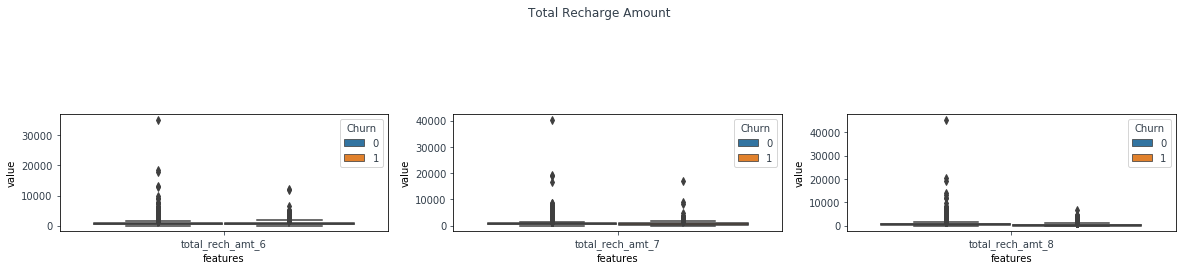

In [69]:
data_list = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
createPlot(data_list,'Total Recharge Amount')

#### Observation:

Significant drop can be seen for total recharge amount for churn customers

### Let us create recharge related variables for good phase

In [70]:
# let's first drop the circle_id
telecom_churn['circle_id'].unique()

array([109], dtype=int64)

In [71]:
telecom_churn.drop('circle_id',inplace=True,axis=1)

In [72]:
#Checking for rechanrge amount of last day by calculating the average of month 6 and 7 and then drop the original columns as these are not longer required

telecom_churn['last_day_rch_amt_good_ph'] = (telecom_churn.last_day_rch_amt_6 + telecom_churn.last_day_rch_amt_7)/2

telecom_churn.drop(['last_day_rch_amt_6','last_day_rch_amt_7'],axis=1,inplace=True)

In [73]:
# Check for columns related to recharge data and recharge num
ls_recharge = telecom_churn.columns[telecom_churn.columns.str.contains('rech_num|max_rech_data',regex=True)]
ls_recharge

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8'],
      dtype='object')

In [74]:
#checking phone numbers of max recharge data and then drop the original variables after creating a new derived column

telecom_churn['max_rech_data_good_ph'] = (telecom_churn.max_rech_data_6 + telecom_churn.max_rech_data_7)/2

telecom_churn.drop(['max_rech_data_6','max_rech_data_7'],axis=1,inplace=True)

In [75]:
# Let us check the variation of total recharge number for churn and non churn customers

total_recharge_number = telecom_churn.columns[telecom_churn.columns.str.contains('total_rech_num')]


pd.DataFrame([telecom_churn.loc[telecom_churn.Churn==0,total_recharge_number].median()
              ,telecom_churn.loc[telecom_churn.Churn==1,total_recharge_number].median()],index={'Non Churned','Churned'})

,total_rech_num_6,total_rech_num_7,total_rech_num_8
Churned,9.0,9.0,8.0
Non Churned,11.0,9.0,4.0


#### Observation:
There is a drop in the median of recharge number month wise.

In [76]:
# let us create a derive column for total recharge for good numbers.

telecom_churn['total_rech_num_good_ph'] = (telecom_churn.total_rech_num_6 + telecom_churn.total_rech_num_7)/2

# drop the original columns as these are not longer required
telecom_churn.drop(['total_rech_num_6','total_rech_num_7'],axis=1,inplace=True)

### ARPU related variable for good phase

In [77]:
telecom_churn['arpu_good_ph'] = (telecom_churn.arpu_6 + telecom_churn.arpu_7)/2

# drop the original columns as these are not longer required
telecom_churn.drop(['arpu_6','arpu_7'],axis=1,inplace=True)

### MOU related variables for good phase

In [78]:
# Let us find out the columns related to MOU.
mou_columns = telecom_churn.columns[telecom_churn.columns.str.contains('mou')]
mou_columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_o

In [79]:
# Let us drop columns with zero variation by checking the standard deviation =0

In [80]:
columns_with_zero_var = telecom_churn.loc[:,mou_columns].std()[telecom_churn.loc[:,mou_columns].std()==0].index.values
columns_with_zero_var

array(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8'],
      dtype=object)

In [81]:
telecom_churn.drop(list(columns_with_zero_var),axis=1,inplace=True)

In [82]:
mou_columns = telecom_churn.columns[telecom_churn.columns.str.contains('mou')]
mou_columns

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [83]:
# Let us check if there is any missing value in mou columns so that we can imput it with 0 as missing value will suggest that the mobile
# has not been used for that particular call type

(100*telecom_churn.loc[:,mou_columns].isnull().sum()/len(telecom_churn.loc[:,mou_columns])).round(2)

onnet_mou_6         1.05
onnet_mou_7         1.01
onnet_mou_8         3.13
offnet_mou_6        1.05
offnet_mou_7        1.01
offnet_mou_8        3.13
roam_ic_mou_6       0.00
roam_ic_mou_7       0.00
roam_ic_mou_8       0.00
roam_og_mou_6       0.00
roam_og_mou_7       0.00
roam_og_mou_8       0.00
loc_og_t2t_mou_6    1.05
loc_og_t2t_mou_7    1.01
loc_og_t2t_mou_8    3.13
loc_og_t2m_mou_6    1.05
loc_og_t2m_mou_7    1.01
loc_og_t2m_mou_8    3.13
loc_og_t2f_mou_6    1.05
loc_og_t2f_mou_7    1.01
loc_og_t2f_mou_8    3.13
loc_og_t2c_mou_6    1.05
loc_og_t2c_mou_7    1.01
loc_og_t2c_mou_8    3.13
loc_og_mou_6        1.05
loc_og_mou_7        1.01
loc_og_mou_8        3.13
std_og_t2t_mou_6    1.05
std_og_t2t_mou_7    1.01
std_og_t2t_mou_8    3.13
std_og_t2m_mou_6    1.05
std_og_t2m_mou_7    1.01
std_og_t2m_mou_8    3.13
std_og_t2f_mou_6    1.05
std_og_t2f_mou_7    1.01
std_og_t2f_mou_8    3.13
std_og_mou_6        1.05
std_og_mou_7        1.01
std_og_mou_8        3.13
isd_og_mou_6        1.05


In [84]:
# As there are NaN values so lets replace them with 0
telecom_churn.loc[:,mou_columns] = telecom_churn.loc[:,mou_columns].replace(np.NaN,0)

### Outgoing variable of minute of usage the month of June 

In [85]:
og_mou_6 = telecom_churn.columns[telecom_churn.columns.str.contains('.*_og_.*mou_6',regex=True)]
og_mou_6

Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')

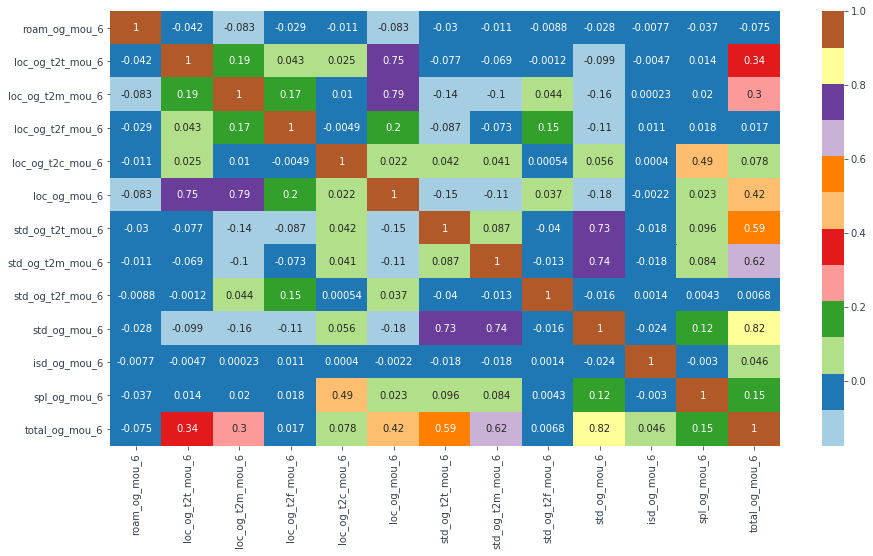

In [86]:
# let us check the correlation among quantititive variables
plt.figure(figsize=(15, 8))
sns.heatmap(telecom_churn.loc[:,og_mou_6].corr(),cmap='Paired',annot=True)
plt.show()

In [87]:
#let us remove og related variables from datase as it has component variables already in the dataset
# let's remove these columns for all months from the data set

list_of_og = telecom_churn.columns[telecom_churn.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
print(list_of_og)
telecom_churn.drop(list_of_og,axis=1,inplace=True)

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')


In [88]:
#Let us derive columns for all good og phone numbers
telecom_churn['spl_og_mou_good_ph'] = (telecom_churn.spl_og_mou_6 + telecom_churn.spl_og_mou_7)/2
telecom_churn['isd_og_mou_good_ph'] = (telecom_churn.isd_og_mou_6 + telecom_churn.isd_og_mou_7)/2
telecom_churn['roam_og_mou_good_ph'] = (telecom_churn.roam_og_mou_6 + telecom_churn.roam_og_mou_7)/2
telecom_churn['std_og_t2m_mou_good_ph'] = (telecom_churn.std_og_t2m_mou_6 + telecom_churn.std_og_t2m_mou_7)/2
telecom_churn['std_og_t2t_mou_good_ph'] = (telecom_churn.std_og_t2t_mou_6 + telecom_churn.std_og_t2t_mou_7)/2
telecom_churn['std_og_t2f_mou_good_ph'] = (telecom_churn.std_og_t2f_mou_6 + telecom_churn.std_og_t2f_mou_7)/2

telecom_churn['loc_og_t2m_mou_good_ph'] = (telecom_churn.loc_og_t2m_mou_6 + telecom_churn.loc_og_t2m_mou_7)/2
telecom_churn['loc_og_t2t_mou_good_ph'] = (telecom_churn.loc_og_t2t_mou_6 + telecom_churn.loc_og_t2t_mou_7)/2
telecom_churn['loc_og_t2f_mou_good_ph'] = (telecom_churn.loc_og_t2f_mou_6 + telecom_churn.loc_og_t2f_mou_7)/2
telecom_churn['loc_og_t2c_mou_good_ph'] = (telecom_churn.loc_og_t2c_mou_6 + telecom_churn.loc_og_t2c_mou_7)/2

In [89]:
# drop all the original og mou variables
list_of_original_og = telecom_churn.columns[telecom_churn.columns.str.contains('.*_og_.*mou_6|.*_og_.*mou_7',regex=True)]

telecom_churn.drop(list_of_original_og,axis=1,inplace=True)

### Incoming minute of usage variable 

In [90]:
ic_mou_6 = telecom_churn.columns[telecom_churn.columns.str.contains('.*_ic_.*mou_6',regex=True)]
ic_mou_6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

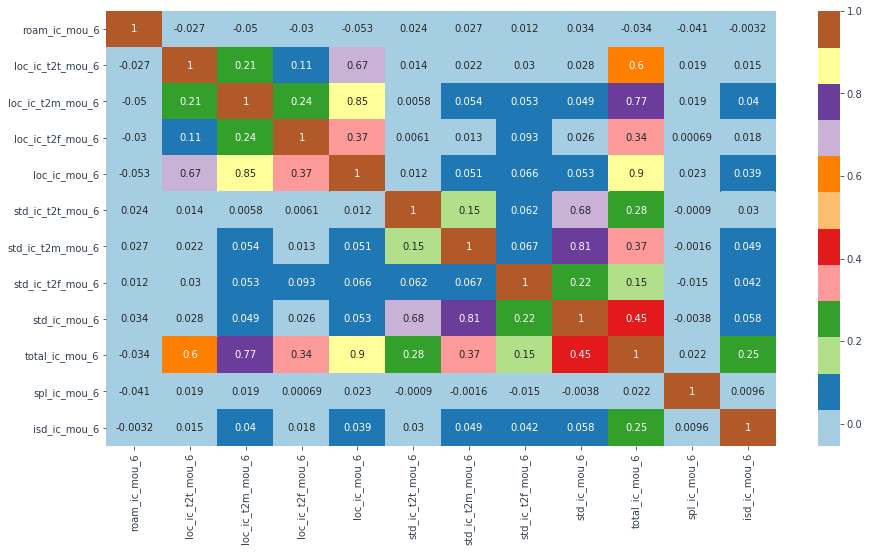

In [91]:
# let us check the correlation among quantititive variables
plt.figure(figsize=(15, 8))
sns.heatmap(telecom_churn.loc[:,ic_mou_6].corr(),cmap='Paired',annot=True)
plt.show()

In [92]:
#let us remove ic related variables from datase as it has component variables already in the dataset
# let's remove these columns for all months from the data set

list_of_ic = telecom_churn.columns[telecom_churn.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
print(list_of_ic)
telecom_churn.drop(list_of_ic,axis=1,inplace=True)

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')


In [93]:
#Let us derive columns for all good ic phone numbers
telecom_churn['spl_ic_mou_good_ph'] = (telecom_churn.spl_ic_mou_6 + telecom_churn.spl_ic_mou_7)/2
telecom_churn['isd_ic_mou_good_ph'] = (telecom_churn.isd_ic_mou_6 + telecom_churn.isd_ic_mou_7)/2
telecom_churn['roam_ic_mou_good_ph'] = (telecom_churn.roam_ic_mou_6 + telecom_churn.roam_ic_mou_7)/2
telecom_churn['std_ic_t2m_mou_good_ph'] = (telecom_churn.std_ic_t2m_mou_6 + telecom_churn.std_ic_t2m_mou_7)/2
telecom_churn['std_ic_t2t_mou_good_ph'] = (telecom_churn.std_ic_t2t_mou_6 + telecom_churn.std_ic_t2t_mou_7)/2
telecom_churn['std_ic_t2f_mou_good_ph'] = (telecom_churn.std_ic_t2f_mou_6 + telecom_churn.std_ic_t2f_mou_7)/2
telecom_churn['loc_ic_t2m_mou_good_ph'] = (telecom_churn.loc_ic_t2m_mou_6 + telecom_churn.loc_ic_t2m_mou_7)/2
telecom_churn['loc_ic_t2t_mou_good_ph'] = (telecom_churn.loc_ic_t2t_mou_6 + telecom_churn.loc_ic_t2t_mou_7)/2
telecom_churn['loc_ic_t2f_mou_good_ph'] = (telecom_churn.loc_ic_t2f_mou_6 + telecom_churn.loc_ic_t2f_mou_7)/2

In [94]:
# drop all the original ic mou variables
list_of_original_ic = telecom_churn.columns[telecom_churn.columns.str.contains('.*_ic_.*mou_6|.*_ic_.*mou_7',regex=True)]

telecom_churn.drop(list_of_original_ic,axis=1,inplace=True)

### OG Others variable  for good phase

In [95]:
telecom_churn['og_others_good_ph'] = (telecom_churn.og_others_6 + telecom_churn.og_others_7)/2
telecom_churn['ic_others_good_ph'] = (telecom_churn.ic_others_6 + telecom_churn.ic_others_6)/2


# drop the original columns as these are not longer required
telecom_churn.drop(['og_others_6','og_others_7','ic_others_6','ic_others_7'],axis=1,inplace=True)

### 2G and 3G related variables for good phase

In [96]:
data_2g_or_3g = telecom_churn.columns[telecom_churn.columns.str.contains('2g|3g',regex=True)]
data_2g_or_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [97]:
(100*(telecom_churn.loc[:,data_2g_or_3g].isnull().sum()/len(telecom_churn.loc[:,data_2g_or_3g]))).round(2)

count_rech_2g_6     0.00
count_rech_2g_7     0.00
count_rech_2g_8     0.00
count_rech_3g_6     0.00
count_rech_3g_7     0.00
count_rech_3g_8     0.00
vol_2g_mb_6         0.00
vol_2g_mb_7         0.00
vol_2g_mb_8         0.00
vol_3g_mb_6         0.00
vol_3g_mb_7         0.00
vol_3g_mb_8         0.00
arpu_3g_6          62.02
arpu_3g_7          61.14
arpu_3g_8          60.83
arpu_2g_6          62.02
arpu_2g_7          61.14
arpu_2g_8          60.83
monthly_2g_6        0.00
monthly_2g_7        0.00
monthly_2g_8        0.00
sachet_2g_6         0.00
sachet_2g_7         0.00
sachet_2g_8         0.00
monthly_3g_6        0.00
monthly_3g_7        0.00
monthly_3g_8        0.00
sachet_3g_6         0.00
sachet_3g_7         0.00
sachet_3g_8         0.00
aug_vbc_3g          0.00
jul_vbc_3g          0.00
jun_vbc_3g          0.00
sep_vbc_3g          0.00
dtype: float64

In [98]:
telecom_churn.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

In [99]:
# Lets check volumn of usage of 2g and 3g
vol_usage_3g_and_2g = telecom_churn.columns[telecom_churn.columns.str.contains('vol_2g|vol_3g',regex=True)]

# let's check the summary stats:
telecom_churn.loc[:,vol_usage_3g_and_2g].describe()

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,78.859009,78.171382,69.209105,258.392681,278.093737,269.864111
std,277.445058,280.331857,268.494284,866.195376,855.682340,859.299266
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14.450000,14.960000,9.620000,0.000000,2.080000,0.000000
max,10285.900000,7873.550000,11117.610000,45735.400000,28144.120000,30036.060000


In [100]:
# variation check based on mean for churn and non churn customers

pd.DataFrame([telecom_churn.loc[telecom_churn.Churn==0,vol_usage_3g_and_2g].mean()
              ,telecom_churn.loc[telecom_churn.Churn==1,vol_usage_3g_and_2g].mean()],index={'Non Churned','Churned'})

,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8
Churned,80.569210,80.925060,74.309036,265.012522,289.478375,290.01639
Non Churned,60.775588,49.054393,15.283185,188.395461,157.714254,56.77688


#### Observation:
2G usage has dropped in month 8 for churned customers

3G volumn has dropped for churned customers for the month of Aug 

In [101]:
# creating 2g and 3g column for good phase
telecom_churn['vol_2g_mb_good_ph'] = (telecom_churn.vol_2g_mb_6 + telecom_churn.vol_2g_mb_7)/2
telecom_churn['vol_3g_mb_good_ph'] = (telecom_churn.vol_3g_mb_6 + telecom_churn.vol_3g_mb_7)/2

# drop the original columns as these are not longer required
telecom_churn.drop(['vol_2g_mb_6','vol_2g_mb_7'
              ,'vol_3g_mb_6','vol_3g_mb_7'],axis=1,inplace=True)

In [102]:
# Also creating monthly 2g and 3g column for good phase
telecom_churn['monthly_2g_good_ph'] = (telecom_churn.monthly_2g_6 + telecom_churn.monthly_2g_7)/2
telecom_churn['monthly_3g_good_ph'] = (telecom_churn.monthly_3g_6 + telecom_churn.monthly_3g_7)/2

# drop the original columns as these are not longer required
telecom_churn.drop(['monthly_2g_6','monthly_2g_7'
              ,'monthly_3g_6','monthly_3g_7'],axis=1,inplace=True)

### VBC (Volumn based cost) for good phase

In [103]:
vbc_2g_3g = telecom_churn.columns[telecom_churn.columns.str.contains('vbc',regex=True)]
vbc_2g_3g

Index(['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'], dtype='object')

In [104]:
# drop sep month column as it is not needed
telecom_churn.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)
telecom_churn.drop('vbc_3g_9',axis=1,inplace=True)

In [105]:
vbc_2g_3g = telecom_churn.columns[telecom_churn.columns.str.contains('vbc_3g',regex=True)]
vbc_2g_3g

Index(['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'], dtype='object')

In [106]:
pd.DataFrame([telecom_churn.loc[telecom_churn.Churn==0,vbc_2g_3g].mean().round(2)
              ,telecom_churn.loc[telecom_churn.Churn==1,vbc_2g_3g].mean().round(2)],index={'Non Churned','Churned'})

,vbc_3g_8,vbc_3g_7,vbc_3g_6
Churned,138.60,141.18,125.12
Non Churned,32.61,71.14,81.56


In [107]:
telecom_churn['vbc_3g_good_ph'] = (telecom_churn['vbc_3g_6'] + telecom_churn['vbc_3g_7'])/2

# drop the original columns as these are not longer required
telecom_churn.drop(['vbc_3g_6','vbc_3g_7'],axis=1,inplace=True)

### Sachet good phase

In [108]:
telecom_churn['sachet_2g_good_ph'] = (telecom_churn.sachet_2g_6 + telecom_churn.sachet_2g_7)/2
telecom_churn['sachet_3g_good_ph'] = (telecom_churn.sachet_3g_6 + telecom_churn.sachet_3g_7)/2

# drop the original columns as these are not longer required
telecom_churn.drop(['sachet_2g_6','sachet_2g_7'
              ,'sachet_3g_6','sachet_3g_7'],axis=1,inplace=True)

### Let us check if we have any other column which has NaN value

In [109]:
missing_value_columns = telecom_churn.isnull().sum()/telecom_churn.shape[0] > .5
missing_value_columns

mobile_number                  False
arpu_8                         False
onnet_mou_6                    False
onnet_mou_7                    False
onnet_mou_8                    False
offnet_mou_6                   False
offnet_mou_7                   False
offnet_mou_8                   False
roam_ic_mou_8                  False
roam_og_mou_8                  False
loc_og_t2t_mou_8               False
loc_og_t2m_mou_8               False
loc_og_t2f_mou_8               False
loc_og_t2c_mou_8               False
std_og_t2t_mou_8               False
std_og_t2m_mou_8               False
std_og_t2f_mou_8               False
isd_og_mou_8                   False
spl_og_mou_8                   False
og_others_8                    False
loc_ic_t2t_mou_8               False
loc_ic_t2m_mou_8               False
loc_ic_t2f_mou_8               False
std_ic_t2t_mou_8               False
std_ic_t2m_mou_8               False
std_ic_t2f_mou_8               False
spl_ic_mou_8                   False
i

In [110]:

100*telecom_churn.loc[:,missing_value_columns].isnull().sum()/len(telecom_churn.loc[:,missing_value_columns])

night_pck_user_6               62.023925
night_pck_user_7               61.140915
night_pck_user_8               60.834361
fb_user_6                      62.023925
fb_user_7                      61.140915
fb_user_8                      60.834361
day_of_last_rech_data_shift    74.432708
dtype: float64

In [111]:
telecom_churn.drop(telecom_churn.columns[missing_value_columns],axis=1,inplace=True)

In [112]:
ls_7_vars = telecom_churn.columns[telecom_churn.columns.str.contains('_7|_6',regex=True)]
print(ls_7_vars)
telecom_churn.drop(ls_7_vars,axis=1,inplace=True)

Index(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'total_rech_amt_6', 'total_rech_amt_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'avg_recharge_amt_6_7', 'total_rech_for_data_6',
       'total_rech_for_data_7'],
      dtype='object')


In [113]:
telecom_churn.shape

(30011, 73)

In [114]:
missing_value_columns = round(100*(telecom_churn.isnull().sum()/telecom_churn.shape[0]),2)
missing_value_columns[missing_value_columns > 0]

og_others_8               3.13
ic_others_8               3.13
day_of_last_rech_shift    2.31
og_others_good_ph         1.60
ic_others_good_ph         1.05
dtype: float64

In [115]:
telecom_churn.loc[:,:] = telecom_churn.loc[:,:].replace(np.NaN,0)

## Model Building

First :  Let us split the data into test and train split

Second :  Feature transformation for better accuracy in predictive model. 

A churn can be seen in drop in parameters in Action phase as compared to good phase(June,July month) from EDA.

In [116]:
telecom_churn.columns

Index(['mobile_number', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8',
       'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'Churn', 'total_rech_for_data_8', 'day_of_last_rech_shift',
       'last_day_rch_amt_good_ph', 'max_rech_data_good_ph',
       'total_rech_num_good_ph', 'arpu_good_ph', 'spl_og_mou_good_ph',
       'isd_og_mou_good_ph', 'roam_og_mou_good_ph', 'std_og_t2m_mou_good_ph'

In [117]:
len(telecom_churn.columns)

73

In [118]:
X  = telecom_churn.drop(['Churn', 'mobile_number'], axis = 1)
y = telecom_churn['Churn']

Lets find out the features of good phase and action phase which is month aug

In [119]:
Feature_of_good_phase = X.loc[:,X.columns.str.contains('good')]
Feature_of_good_phase

,last_day_rch_amt_good_ph,max_rech_data_good_ph,total_rech_num_good_ph,arpu_good_ph,spl_og_mou_good_ph,isd_og_mou_good_ph,roam_og_mou_good_ph,std_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,loc_og_t2m_mou_good_ph,loc_og_t2t_mou_good_ph,loc_og_t2f_mou_good_ph,loc_og_t2c_mou_good_ph,spl_ic_mou_good_ph,isd_ic_mou_good_ph,roam_ic_mou_good_ph,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,og_others_good_ph,ic_others_good_ph,vol_2g_mb_good_ph,vol_3g_mb_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,vbc_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph
7,0.0,0.0,5.0,1209.5150,2.250,0.09,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.000,0.105,8.295,24.860,109.215,24.360,43.215,219.525,45.200,126.810,0.000,15.74,0.000,0.000,0.0,0.0,19.060,0.0,0.0
8,25.0,77.0,20.0,435.4720,0.000,0.00,0.000,11.865,124.995,0.00,75.770,257.360,0.000,0.000,0.000,0.000,0.000,13.255,0.290,0.000,35.780,16.840,0.000,0.000,0.00,178.000,375.475,0.5,0.0,516.405,0.5,0.0
13,80.0,0.0,5.0,349.2585,0.000,0.00,21.620,154.150,266.195,0.00,99.205,27.910,2.270,0.000,0.225,153.695,83.885,168.960,76.985,0.000,80.705,37.730,2.405,0.000,83.48,0.000,0.000,0.0,0.0,0.000,0.0,0.0
16,100.0,0.0,8.0,365.4220,1.630,0.00,8.870,43.750,5.235,0.00,209.640,53.885,2.240,0.000,0.000,0.000,1.415,45.880,73.715,0.255,188.250,56.385,8.695,0.000,0.00,0.000,0.000,0.0,0.0,12.170,0.0,0.0
17,15.0,0.0,10.5,354.4940,1.290,0.00,4.230,0.775,573.860,0.00,29.270,19.495,0.000,0.000,0.000,0.000,2.380,0.640,4.315,0.000,24.860,17.270,0.000,0.465,0.00,0.000,0.000,0.0,0.0,0.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,40.0,23.0,15.0,335.9415,4.415,0.00,23.020,368.180,5.440,0.00,20.070,68.360,0.080,3.500,0.000,0.000,2.530,18.985,0.730,0.000,53.250,72.050,1.940,0.000,0.00,0.000,0.000,0.0,0.0,0.000,3.0,0.0
99974,120.0,0.0,7.5,367.6980,3.305,0.00,0.000,18.525,0.000,5.17,374.845,5.055,2.295,0.465,0.000,0.000,0.000,3.865,0.000,8.120,86.070,6.785,3.015,1.540,0.00,0.000,0.000,0.0,0.0,0.000,0.0,0.0
99986,668.0,15.5,7.0,550.1005,16.335,0.00,0.000,118.835,75.360,0.00,560.885,602.675,17.880,16.335,0.000,0.215,0.000,6.585,1.155,1.365,435.455,122.375,34.325,0.000,0.00,25.345,932.675,0.0,0.0,601.375,1.0,0.0
99988,50.0,77.0,12.0,412.7450,0.000,0.00,0.000,83.135,28.795,0.00,143.305,158.380,0.000,0.000,0.000,0.000,0.000,376.665,11.645,0.505,250.885,25.730,21.410,0.000,0.20,0.000,6.780,0.5,0.0,0.000,0.0,0.0


In [120]:
feature_of_8 = X.loc[:,X.columns.str.contains('_8')]
feature_of_8

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,total_rech_for_data_8
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,49.14,16.68,10.01,6.50,0.0,27.31,121.19,39.53,30.39,141.33,22.21,0.0,31.59,15.14,7,3638,1580,779,0.0,0.00,0.00,0,0,0,0,57.74,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,75.69,0.00,0.00,10.23,0.0,0.31,15.48,0.00,0.10,0.65,0.00,0.0,0.00,0.00,14,120,30,10,23.0,0.03,11.94,0,3,0,0,21.03,207.0
13,593.260,534.24,482.46,72.11,1.44,36.01,294.46,23.51,0.49,498.23,156.94,0.00,1.29,4.78,0.0,52.58,195.18,7.49,154.58,317.91,1.91,0.0,393.39,21.44,11,717,130,0,23.0,0.02,0.00,0,3,0,0,0.00,207.0
16,187.894,70.61,162.76,0.00,0.00,67.38,128.28,10.26,0.00,3.23,18.29,0.00,0.00,5.91,0.0,28.89,150.16,32.71,6.33,73.93,2.18,0.0,0.23,0.00,2,160,130,130,0.0,0.00,0.00,0,0,0,0,0.00,0.0
17,25.499,7.79,5.54,4.81,13.34,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4,30,30,0,0.0,0.00,0.00,0,0,0,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99970,290.851,97.61,355.48,0.00,0.00,76.83,59.84,1.21,20.85,20.78,273.56,0.00,0.00,20.96,0.0,81.63,154.46,1.53,13.28,47.83,0.00,0.0,0.00,2.66,13,337,67,30,0.0,0.00,0.00,0,0,0,0,0.00,0.0
99974,371.016,1.30,360.58,0.00,0.00,0.00,353.91,1.00,0.13,1.30,4.88,0.00,0.00,2.83,0.0,0.61,46.54,0.55,0.00,5.41,0.00,0.0,0.00,0.00,3,388,130,130,0.0,0.00,0.00,0,0,0,0,0.00,0.0
99986,564.334,775.41,595.44,0.00,0.00,718.56,493.48,13.01,9.15,56.84,88.94,0.00,0.00,9.15,0.0,148.21,450.01,37.61,0.00,23.71,0.45,0.0,0.00,0.00,3,25,25,0,25.0,6.47,926.78,0,1,0,0,497.45,25.0
99988,402.080,2.46,248.33,0.00,0.00,2.46,128.01,0.00,0.01,0.00,120.29,0.00,0.00,0.01,0.0,1.50,1122.83,20.31,2.03,86.11,0.71,0.0,0.00,0.31,9,504,154,50,154.0,0.79,678.74,1,0,0,0,104.73,154.0


In [121]:
# Let us find the features removing good phase and 8th month indicators

explorable_features = set(map(lambda x: x.replace("_good_ph", ""), Feature_of_good_phase))
explorable_features

{'arpu',
 'ic_others',
 'isd_ic_mou',
 'isd_og_mou',
 'last_day_rch_amt',
 'loc_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'loc_ic_t2t_mou',
 'loc_og_t2c_mou',
 'loc_og_t2f_mou',
 'loc_og_t2m_mou',
 'loc_og_t2t_mou',
 'max_rech_data',
 'monthly_2g',
 'monthly_3g',
 'og_others',
 'roam_ic_mou',
 'roam_og_mou',
 'sachet_2g',
 'sachet_3g',
 'spl_ic_mou',
 'spl_og_mou',
 'std_ic_t2f_mou',
 'std_ic_t2m_mou',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'std_og_t2m_mou',
 'std_og_t2t_mou',
 'total_rech_num',
 'vbc_3g',
 'vol_2g_mb',
 'vol_3g_mb'}

In [122]:
#  derive column for month 8. For this we have to create a function that differentiate the features between 8th month and good phase
def featureDifferentiator(x,y):      
    difference = 0.00
    if np.isnan(x) and np.isnan(y):
        difference = np.NAN
    elif np.isnan(y) and ~np.isnan(x):
        difference = x
    elif ~np.isnan(y)and np.isnan(x):
        difference = -y
    else:
        difference = x-y
    
    return(difference)

In [123]:
X_Copy = X.copy() # Creating a copy of the set to apply the differentiator

In [124]:
for feature in explorable_features:
   
    X_Copy[feature+'_act_ph']= np.vectorize(featureDifferentiator)(X_Copy[feature+'_8'], X_Copy[feature+'_good_ph'])

In [125]:
X_Copy.drop(feature_of_8,axis=1,inplace=True) # dropping this as already we have derived

In [126]:
X_Copy.shape

(30011, 66)

In [127]:
X_Copy.head()

,aon,day_of_last_rech_shift,last_day_rch_amt_good_ph,max_rech_data_good_ph,total_rech_num_good_ph,arpu_good_ph,spl_og_mou_good_ph,isd_og_mou_good_ph,roam_og_mou_good_ph,std_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,loc_og_t2m_mou_good_ph,loc_og_t2t_mou_good_ph,loc_og_t2f_mou_good_ph,loc_og_t2c_mou_good_ph,spl_ic_mou_good_ph,isd_ic_mou_good_ph,roam_ic_mou_good_ph,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,og_others_good_ph,ic_others_good_ph,vol_2g_mb_good_ph,vol_3g_mb_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,vbc_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph,max_rech_data_act_ph,sachet_3g_act_ph,isd_ic_mou_act_ph,roam_og_mou_act_ph,og_others_act_ph,std_og_t2f_mou_act_ph,last_day_rch_amt_act_ph,monthly_2g_act_ph,roam_ic_mou_act_ph,monthly_3g_act_ph,loc_ic_t2m_mou_act_ph,loc_og_t2c_mou_act_ph,isd_og_mou_act_ph,std_ic_t2m_mou_act_ph,total_rech_num_act_ph,std_ic_t2t_mou_act_ph,arpu_act_ph,vbc_3g_act_ph,std_ic_t2f_mou_act_ph,loc_og_t2m_mou_act_ph,loc_ic_t2t_mou_act_ph,loc_og_t2t_mou_act_ph,ic_others_act_ph,std_og_t2t_mou_act_ph,loc_ic_t2f_mou_act_ph,sachet_2g_act_ph,vol_2g_mb_act_ph,spl_og_mou_act_ph,loc_og_t2f_mou_act_ph,std_og_t2m_mou_act_ph,spl_ic_mou_act_ph,vol_3g_mb_act_ph
7,802,0.0,0.0,0.0,5.0,1209.5150,2.25,0.09,18.165,40.825,13.795,13.37,378.005,41.385,58.635,0.0,0.105,8.295,24.860,109.215,24.360,43.215,219.525,45.200,126.810,0.000,15.74,0.0,0.000,0.0,0.0,19.060,0.0,0.0,0.0,0.0,23.295,19.895,0.000,3.31,779.0,0.0,6.780,0.0,-98.335,0.00,9.92,32.115,2.0,6.030,1961.9650,38.680,-21.005,-215.725,-17.890,-1.105,-0.60,-1.785,-87.280,0.0,0.00,4.25,-5.405,8.315,-0.105,0.000
8,315,2.0,25.0,77.0,20.0,435.4720,0.00,0.00,0.000,11.865,124.995,0.00,75.770,257.360,0.000,0.0,0.000,0.000,0.000,13.255,0.290,0.000,35.780,16.840,0.000,0.000,0.00,178.0,375.475,0.5,0.0,516.405,0.5,0.0,-54.0,0.0,0.000,0.000,0.000,0.00,-15.0,-0.5,0.000,0.0,-20.300,7.15,0.00,-12.605,-6.0,-0.190,-298.1100,-495.375,0.000,-25.230,-16.530,-244.870,0.00,-102.415,0.000,2.5,-177.97,10.23,0.000,63.825,0.000,-363.535
13,2607,9.0,80.0,0.0,5.0,349.2585,0.00,0.00,21.620,154.150,266.195,0.00,99.205,27.910,2.270,0.0,0.225,153.695,83.885,168.960,76.985,0.000,80.705,37.730,2.405,0.000,83.48,0.0,0.000,0.0,0.0,0.000,0.0,0.0,23.0,0.0,239.695,-20.180,0.000,0.00,-80.0,0.0,-11.775,0.0,114.475,0.49,1.29,148.950,6.0,77.595,244.0015,0.000,1.910,195.255,14.850,8.100,-62.04,232.035,5.085,3.0,0.02,4.78,21.240,2.790,-0.225,0.000
16,511,-16.5,100.0,0.0,8.0,365.4220,1.63,0.00,8.870,43.750,5.235,0.00,209.640,53.885,2.240,0.0,0.000,0.000,1.415,45.880,73.715,0.255,188.250,56.385,8.695,0.000,0.00,0.0,0.000,0.0,0.0,12.170,0.0,0.0,0.0,0.0,0.230,-8.870,0.000,0.00,30.0,0.0,-1.415,0.0,-38.090,0.00,0.00,28.050,-6.0,-67.385,-177.5280,-12.170,1.925,-81.360,-27.495,13.495,0.00,-2.005,24.015,0.0,0.00,4.28,8.020,-25.460,0.000,0.000
17,667,-5.0,15.0,0.0,10.5,354.4940,1.29,0.00,4.230,0.775,573.860,0.00,29.270,19.495,0.000,0.0,0.000,0.000,2.380,0.640,4.315,0.000,24.860,17.270,0.000,0.465,0.00,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.000,9.110,-0.465,0.00,-15.0,0.0,2.430,0.0,-24.860,0.00,0.00,-0.640,-6.5,-4.315,-328.9950,0.000,0.000,-29.270,-17.270,-19.495,0.00,-573.860,0.000,0.0,0.00,-1.29,0.000,-0.775,0.000,0.000


### Let us do feature standardization

In [128]:
scaler=StandardScaler()
X_standard=scaler.fit_transform(X_Copy)
X_standard=pd.DataFrame(X_standard,columns=X_Copy.columns)
X_standard.head()

# Spliting train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_standard,y,train_size=0.7,random_state=100)

In [129]:
print(X_train.shape)
print(y_train.shape)

(21007, 66)
(21007,)


### Logistic Regression

In [130]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [131]:
y_pred = lr.predict(X_test)

In [132]:
cm = confusion_matrix(y_test, y_pred)

In [133]:
    print('Confusion Matrix is as follows:')
    print(cm)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print("True Positive", cm[1,1])
    print("True Negative",cm[0,0])
    print("False Positive",cm[0,1])
    print("False Negative",cm[1,0])
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Recall:', sensitivity)
    print('Precision:' , precision)
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix is as follows:
[[8135   99]
 [ 566  204]]
True Positive 204
True Negative 8135
False Positive 99
False Negative 566
Sensitivity: 0.2649350649350649
Specificity: 0.9879766820500364
Recall: 0.2649350649350649
Precision: 0.6732673267326733
ROC AUC Score: 0.6264558734925506
F1 Score: 0.38024231127679403


#### Observation:

We can see from above that there are imbalance in data as the AUC score is pretty low along with sensitivity.

To resolve the imbalance we can use 

SMOTE resampling and Undersampling 

#### SMOTE resampling

In [134]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [135]:
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [136]:
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test)

In [137]:
cm = confusion_matrix(y_test, y_pred)

In [138]:
    print('Confusion Matrix:')
    print(cm)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print("True Positive", cm[1,1])
    print("True Negative",cm[0,0])
    print("False Positive",cm[0,1])
    print("False Negative",cm[1,0])
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Recall:', sensitivity)
    print('Precision:' , precision)
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6823 1411]
 [ 114  656]]
True Positive 656
True Negative 6823
False Positive 1411
False Negative 114
Sensitivity: 0.8519480519480519
Specificity: 0.8286373572990041
Recall: 0.8519480519480519
Precision: 0.3173681664247702
ROC AUC Score: 0.840292704623528
F1 Score: 0.46246034543531905


False Negative is less which is a good indicator as the model has to refrain from wrongly prediction non churn customers as churn

#### Undersampling

In [139]:
temporary_data = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)],axis=1)
temporary_data_minority  = temporary_data.loc[temporary_data.Churn == 1,:] # minority class is churn
train_undersampled = pd.concat([temporary_data_minority,temporary_data.loc[temporary_data.Churn == 0,:].sample(
    temporary_data_minority.shape[0])])

In [140]:
X_us = train_undersampled.drop(['Churn'], axis = 1)
y_us = train_undersampled['Churn']

In [141]:
lr = LogisticRegression()

In [142]:
lr.fit(X_us, y_us)
y_pred = lr.predict(X_test)

In [143]:
cm = confusion_matrix(y_test, y_pred)

In [144]:
    print('Confusion Matrix:')
    print(cm)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print("True Positive", cm[1,1])
    print("True Negative",cm[0,0])
    print("False Positive",cm[0,1])
    print("False Negative",cm[1,0])
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Recall:', sensitivity)
    print('Precision:' , precision)
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6632 1602]
 [ 102  668]]
True Positive 668
True Negative 6632
False Positive 1602
False Negative 102
Sensitivity: 0.8675324675324675
Specificity: 0.8054408549914986
Recall: 0.8675324675324675
Precision: 0.29427312775330394
ROC AUC Score: 0.8364866612619831
F1 Score: 0.43947368421052624


#### Observation:

Undersampling is preferrable as F1 score is maximum

### PCA Analysis

In [145]:
pca = PCA(svd_solver='randomized', random_state=101)

In [146]:
pca.fit(X_us)

PCA(random_state=101, svd_solver='randomized')

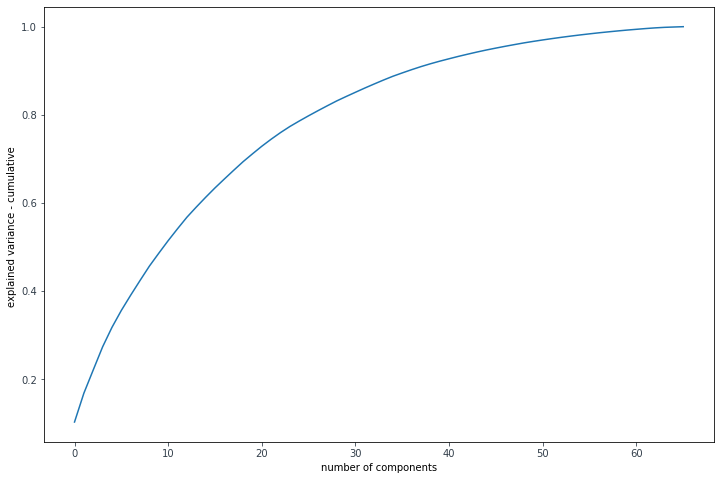

In [147]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance - cumulative ')
plt.show()

In [148]:
pca_incre = IncrementalPCA(n_components = 48)

In [149]:
X_train_pca_incre = pca_incre.fit_transform(X_us)

In [150]:
X_test_pca_incre = pca_incre.transform(X_test)

In [151]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca_incre, y_us)

LogisticRegression()

In [152]:
y_pred_pca = lr_pca.predict(X_test_pca_incre)

In [153]:
cm = confusion_matrix(y_test, y_pred_pca)

In [154]:
    print('Confusion Matrix:')
    print(cm)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print("True Positive", cm[1,1])
    print("True Negative",cm[0,0])
    print("False Positive",cm[0,1])
    print("False Negative",cm[1,0])
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Recall:', sensitivity)
    print('Precision:' , precision)
    print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred_pca))

Confusion Matrix:
[[6619 1615]
 [ 112  658]]
True Positive 658
True Negative 6619
False Positive 1615
False Negative 112
Sensitivity: 0.8545454545454545
Specificity: 0.8038620354627156
Recall: 0.8545454545454545
Precision: 0.28948526176858774
ROC AUC Score: 0.8364866612619831
F1 Score: 0.4324679592507394


In [155]:
prob_y_pred = lr_pca.predict_proba(X_test_pca_incre)

In [156]:
# create predicted probability data frame
y_pred_prob_df = pd.DataFrame(prob_y_pred)
y_pred_prob_df = y_pred_prob_df.iloc[:,[1]]

y_test_df = pd.DataFrame(y_test)
y_test_df['ID'] = y_test_df.index

y_pred_prob_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_prob_df
y_pred_final = pd.concat([y_test_df,y_pred_prob_df],axis=1)

In [157]:
# renaming column
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})
y_pred_final.head()

,Churn,ID,Churn_Prob
0,0,29360,0.771238
1,0,49979,0.699159
2,0,90612,0.051349
3,0,87007,0.081530
4,0,91852,0.152798


In [158]:
y_pred_final = y_pred_final.reindex(['ID','Churn','Churn_Prob'], axis=1)
y_pred_final.head()

,ID,Churn,Churn_Prob
0,29360,0,0.771238
1,49979,0,0.699159
2,90612,0,0.051349
3,87007,0,0.081530
4,91852,0,0.152798


In [159]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,ID,Churn,Churn_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,29360,0,0.771238,1,1,1,1,1,1,1,1,0,0
1,49979,0,0.699159,1,1,1,1,1,1,1,0,0,0
2,90612,0,0.051349,1,0,0,0,0,0,0,0,0,0
3,87007,0,0.081530,1,0,0,0,0,0,0,0,0,0
4,91852,0,0.152798,1,1,0,0,0,0,0,0,0,0


In [160]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','speci','sensi','preci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    preci = cm1[1,1]/(cm1[0,1]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,speci,sensi,preci]
print(cutoff_df)

     prob  accuracy     speci     sensi     preci
0.0   0.0  0.085518  0.000000  1.000000  0.085518
0.1   0.1  0.394158  0.339446  0.979221  0.121750
0.2   0.2  0.538205  0.499150  0.955844  0.151440
0.3   0.3  0.646935  0.620355  0.931169  0.186573
0.4   0.4  0.737672  0.722492  0.900000  0.232707
0.5   0.5  0.808196  0.803862  0.854545  0.289485
0.6   0.6  0.859063  0.864586  0.800000  0.355864
0.7   0.7  0.894713  0.911586  0.714286  0.430360
0.8   0.8  0.917925  0.952514  0.548052  0.519065
0.9   0.9  0.919591  0.980568  0.267532  0.562842


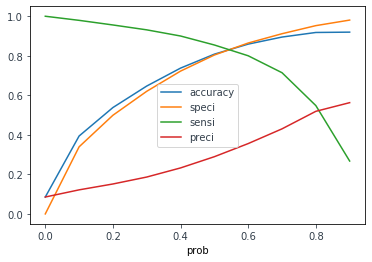

In [161]:
cutoff_df.plot.line(x='prob', y=['accuracy','speci','sensi','preci'])

In [162]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.50 else 0)

In [163]:
cm = confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted)

In [164]:
    print('Confusion Matrix:')
    print(cm)
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
    precision = cm[1,1]/(cm[0,1]+cm[1,1])
    print("True Positive", cm[1,1])
    print("True Negative",cm[0,0])
    print("False Positive",cm[0,1])
    print("False Negative",cm[1,0])
    print('Sensitivity:', sensitivity)
    print('Specificity:', specificity)
    print('Recall:', sensitivity)
    print('Precision:' , precision)
    print('ROC AUC Score:', roc_auc_score(y_pred_final.Churn, y_pred_final.final_predicted))
    print('F1 Score:', f1_score(y_pred_final.Churn, y_pred_final.final_predicted))

Confusion Matrix:
[[6619 1615]
 [ 112  658]]
True Positive 658
True Negative 6619
False Positive 1615
False Negative 112
Sensitivity: 0.8545454545454545
Specificity: 0.8038620354627156
Recall: 0.8545454545454545
Precision: 0.28948526176858774
ROC AUC Score: 0.829203745004085
F1 Score: 0.4324679592507394


### Decision Tree

In [165]:

# set hyper parameters
grid_search_best_params_ = {'max_depth': 6,
                            'max_features': 40,
                            'min_samples_leaf': 10,
                            'min_samples_split': 20,
                            'random_state': 43}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_us, y_us)
y_predict = dtree.predict(X_test)


In [166]:
# Let us find out the sensitivity of the decision tree.

In [167]:
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))

Confusion Matrix:
[[6907 1327]
 [ 123  647]]
True Positive 647
True Negative 6907
False Positive 1327
False Negative 123
Sensitivity: 0.8402597402597403
Specificity: 0.8388389604080642
Recall: 0.8402597402597403
Precision: 0.32776089159067884
ROC AUC Score: 0.8395493503339022
F1 Score: 0.4715743440233236


In [168]:
# set hyper parameters
grid_search_best_params_ = {'max_depth': 1,
                            'max_features': 10,
                            'min_samples_leaf': 10,
                            'min_samples_split': 20,
                            'random_state': 43}

# Build Decision tree using parameters obtained.
dtree=DecisionTreeClassifier(**grid_search_best_params_)
dtree.fit(X_us, y_us)
y_predict = dtree.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_predict))
print('F1 Score:', f1_score(y_test, y_predict))

Confusion Matrix:
[[6116 2118]
 [ 281  489]]
True Positive 489
True Negative 6116
False Positive 2118
False Negative 281
Sensitivity: 0.6350649350649351
Specificity: 0.7427738644644158
Recall: 0.6350649350649351
Precision: 0.18757192174913695
ROC AUC Score: 0.6889193997646755
F1 Score: 0.2896061593129997


### Observation:

Decision tree with recall scores better than the one with accuracy score

### Let us try some boosting algorithm

#### Ada Boost

In [169]:
shallow_tree = DecisionTreeClassifier(max_depth=1, random_state = 100)
# fit the shallow decision tree 
shallow_tree.fit(X_us, y_us)

# test error
y_pred = shallow_tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6807 1427]
 [ 226  544]]
True Positive 544
True Negative 6807
False Positive 1427
False Negative 226
Sensitivity: 0.7064935064935065
Specificity: 0.8266941948020403
Recall: 0.7064935064935065
Precision: 0.27600202942668695
ROC AUC Score: 0.7665938506477734
F1 Score: 0.39693542502736223


In [170]:
estimators = list(range(1, 50, 3))

abc_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(
    base_estimator=shallow_tree, 
    n_estimators = n_est)
    
    ABC.fit(X_us, y_us)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [171]:
abc_scores

[0.8164149266992448,
 0.836961350510884,
 0.8226343847179032,
 0.8322967569968903,
 0.8348511772545535,
 0.8342958685028876,
 0.8304087072412262,
 0.8354064860062195,
 0.8332963127498889,
 0.8335184362505553,
 0.8340737450022212,
 0.8316303864948912,
 0.8350733007552199,
 0.833962683251888,
 0.833962683251888,
 0.833962683251888,
 0.8348511772545535]

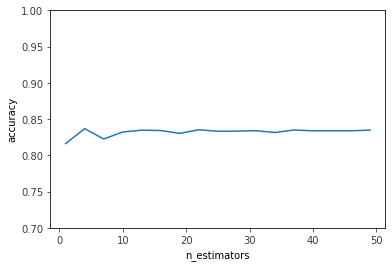

In [172]:
plt.plot(estimators, abc_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.7, 1])
plt.show()

In [173]:
ABC = AdaBoostClassifier(n_estimators=40,base_estimator=shallow_tree)

In [174]:
ABC.fit(X_us,y_us)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=100),
                   n_estimators=40)

In [175]:
y_pred =  ABC.predict(X_test)

In [176]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6838 1396]
 [  99  671]]
True Positive 671
True Negative 6838
False Positive 1396
False Negative 99
Sensitivity: 0.8714285714285714
Specificity: 0.8304590721399077
Recall: 0.8714285714285714
Precision: 0.3246250604741171
ROC AUC Score: 0.8509438217842396
F1 Score: 0.4730348960169194


### XGBoost Algorithm

In [177]:
XGB = XGBClassifier()

XGB.fit(X_us,y_us)
y_pred =  XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[7116 1118]
 [  93  677]]
True Positive 677
True Negative 7116
False Positive 1118
False Negative 93
Sensitivity: 0.8792207792207792
Specificity: 0.8642215205246538
Recall: 0.8792207792207792
Precision: 0.37715877437325906
ROC AUC Score: 0.8717211498727165
F1 Score: 0.5278752436647174


### We can see from  the scores that XGBoost performace better than base logistic regression model. Let us do some hyper parameter tuning

In [178]:
# creating a KFold cross validation 
folds = 3

# specify range of hyperparameters
param_grid = {'scale_pos_weight': [1.8,1.81,1.82,1.83,1.84,1.85,1.86,1.87,1.88,1.89, 1.9]}

# specify model
xgb_model = XGBClassifier(max_depth=1, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'f1', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,n_jobs=3)

In [179]:
model_cv.fit(X_us, y_us)

Fitting 3 folds for each of 11 candidates, totalling 33 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  33 out of  33 | elapsed:   19.9s finished


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=1, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [180]:
model_cv.best_params_

{'scale_pos_weight': 1.82}

In [181]:
params = {'learning_rate': 0.1,
          'max_depth': 1, 
          'n_estimators':200,
          'subsample':1,
         'objective':'binary:logistic',
          'scale_pos_weight': 1.8}

# fit model on training data
XGB = XGBClassifier(params = params)
XGB.fit(X_us, y_us)

[19:40:16] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { params } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'scale_pos_weight': 1.8,
                      'subsample': 1},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [182]:
y_pred =  XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[7116 1118]
 [  93  677]]
True Positive 677
True Negative 7116
False Positive 1118
False Negative 93
Sensitivity: 0.8792207792207792
Specificity: 0.8642215205246538
Recall: 0.8792207792207792
Precision: 0.37715877437325906
ROC AUC Score: 0.8717211498727165
F1 Score: 0.5278752436647174


In [183]:
# Let us increase the sensitivity by increasing the scale_pos_weight

XGB = XGBClassifier(scale_pos_weight=2.1)
XGB.fit(X_us,y_us)
y_pred =  XGB.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6919 1315]
 [  79  691]]
True Positive 691
True Negative 6919
False Positive 1315
False Negative 79
Sensitivity: 0.8974025974025974
Specificity: 0.8402963322807869
Recall: 0.8974025974025974
Precision: 0.3444666001994018
ROC AUC Score: 0.8688494648416922
F1 Score: 0.4978386167146975


### Random Forest

In [184]:
RF = RandomForestClassifier(**grid_search_best_params_, n_estimators=30)
RF.fit(X_us, y_us)
y_pred = RF.predict(X_test)

In [185]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Confusion Matrix:
[[6891 1343]
 [ 186  584]]
True Positive 584
True Negative 6891
False Positive 1343
False Negative 186
Sensitivity: 0.7584415584415585
Specificity: 0.8368957979111004
Recall: 0.7584415584415585
Precision: 0.3030617540217955
ROC AUC Score: 0.7976686781763294
F1 Score: 0.4330737856878013


### Support Vector

In [186]:
SVM = LinearSVC()
SVM.fit(X_train_pca_incre, y_us)
cm = confusion_matrix(y_test, SVM.predict(X_test_pca_incre))
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_test, SVM.predict(X_test_pca_incre)))
print('F1 Score:', f1_score(y_test, SVM.predict(X_test_pca_incre)))

Confusion Matrix:
[[6564 1670]
 [ 108  662]]
True Positive 662
True Negative 6564
False Positive 1670
False Negative 108
Sensitivity: 0.8597402597402597
Specificity: 0.7971824143794025
Recall: 0.8597402597402597
Precision: 0.28387650085763294
ROC AUC Score: 0.8284613370598312
F1 Score: 0.4268214055448098


### Observation:

From all above models we can see that XBoost with scale_pos_weight score of 2.1 scores the best

### Feature Analysis

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [188]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [189]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20935
Model Family:                Binomial   Df Model:                           71
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4020.7
Date:                Mon, 31 Aug 2020   Deviance:                       8041.4
Time:                        19:40:22   Pearson chi2:                 4.03e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.8114      0.091     -8.920      0.000      -0.990      -0.633
arpu_8                      -0.0003      0.000     -1.094      0.274      -0.001       0.000
onnet_mou_8                 -0.0023      0.003     -0.729      0.466      -0.008       0.004
offnet_mou_8                -0.0037      0.003     -1.184      0.236      -0.010       0.002
roam_ic_mou_8             3.874e-05      0.000      0.088      0.930      -0.001       0.001
roam_og_mou_8                0.0032      0.003      1.033      0.301      -0.003       0.009
loc_og_t2t_mou_8            -0.0008      0.003     -0.233      0.815      -0.007       0.006
loc_og_t2m_mou_8             0.0022      0.003      0.692      0.489      -0.004       0.008
loc_og_t2f_mou_8             0.0005      0.005      0.099      0.922      -0.009       0.010
loc_og_t2c_mou_8             0.0036      0.007      0.490      0.624      -0.011       0.018
std_og_t2t_mou_8             0.0017      0.003      0.531      0.595      -0.005       0.008
std_og_t2m_mou_8             0.0025      0.003      0.812      0.417      -0.004       0.009
std_og_t2f_mou_8            -0.0097      0.010     -0.991      0.322      -0.029       0.010
isd_og_mou_8                 0.0030      0.004      0.750      0.454      -0.005       0.011
spl_og_mou_8                -0.0029      0.004     -0.657      0.511      -0.011       0.006
og_others_8                  0.0160      0.009      1.727      0.084      -0.002       0.034
loc_ic_t2t_mou_8            -0.0055      0.001     -4.748      0.000      -0.008      -0.003
loc_ic_t2m_mou_8            -0.0073      0.001     -9.856      0.000      -0.009      -0.006
loc_ic_t2f_mou_8            -0.0133      0.004     -3.717      0.000      -0.020      -0.006
std_ic_t2t_mou_8            -0.0076      0.002     -4.252      0.000      -0.011      -0.004
std_ic_t2m_mou_8            -0.0014      0.001     -2.032      0.042      -0.003   -4.92e-05
std_ic_t2f_mou_8            -0.0078      0.007     -1.127      0.260      -0.021       0.006
spl_ic_mou_8                -4.3396      0.656     -6.616      0.000      -5.625      -3.054
isd_ic_mou_8                -0.0019      0.001     -1.675      0.094      -0.004       0.000
ic_others_8                 -0.0070      0.009     -0.826      0.409      -0.024       0.010
total_rech_num_8            -0.0353      0.008     -4.609      0.000      -0.050      -0.020
total_rech_amt_8          6.291e-05      0.000      0.232      0.817      -0.000       0.001
max_rech_amt_8               0.0003      0.000      1.023      0.306      -0.000       0.001
last_day_rch_amt_8          -0.0047      0.001     -9.191      0.000      -0.006      -0.004
max_rech_data_8             -0.0014      0.001     -1.575      0.115      -0.003       0.000
vol_2g_mb_8   

In [190]:
print(X_train.shape)
print(y_train.shape)

(21007, 71)
(21007,)


### Feature selection using RFE

In [191]:
X_train.columns

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'isd_og_mou_8', 'spl_og_mou_8',
       'og_others_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'max_rech_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'total_rech_for_data_8', 'day_of_last_rech_shift',
       'last_day_rch_amt_good_ph', 'max_rech_data_good_ph',
       'total_rech_num_good_ph', 'arpu_good_ph', 'spl_og_mou_good_ph',
       'isd_og_mou_good_ph', 'roam_og_mou_good_ph', 'std_og_t2m_mou_good_ph',
       'std_og_t2t_mou_g

In [192]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X_train)
X_scaled=pd.DataFrame(X_scaled,columns=X_train.columns)
X_scaled.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_t2f_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,total_rech_amt_8,max_rech_amt_8,last_day_rch_amt_8,max_rech_data_8,vol_2g_mb_8,vol_3g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,total_rech_for_data_8,day_of_last_rech_shift,last_day_rch_amt_good_ph,max_rech_data_good_ph,total_rech_num_good_ph,arpu_good_ph,spl_og_mou_good_ph,isd_og_mou_good_ph,roam_og_mou_good_ph,std_og_t2m_mou_good_ph,std_og_t2t_mou_good_ph,std_og_t2f_mou_good_ph,loc_og_t2m_mou_good_ph,loc_og_t2t_mou_good_ph,loc_og_t2f_mou_good_ph,loc_og_t2c_mou_good_ph,spl_ic_mou_good_ph,isd_ic_mou_good_ph,roam_ic_mou_good_ph,std_ic_t2m_mou_good_ph,std_ic_t2t_mou_good_ph,std_ic_t2f_mou_good_ph,loc_ic_t2m_mou_good_ph,loc_ic_t2t_mou_good_ph,loc_ic_t2f_mou_good_ph,og_others_good_ph,ic_others_good_ph,vol_2g_mb_good_ph,vol_3g_mb_good_ph,monthly_2g_good_ph,monthly_3g_good_ph,vbc_3g_good_ph,sachet_2g_good_ph,sachet_3g_good_ph
0,-0.318969,0.320115,-0.594406,-0.173141,-0.209478,-0.324009,-0.702254,-0.317205,-0.250817,0.573021,-0.219200,-0.152592,-0.045443,-0.170889,-0.019525,-0.405483,-0.684197,-0.326399,0.626536,0.706536,-0.127334,-0.249042,-0.152432,-0.095158,1.539738,-0.293746,-0.648201,-0.580228,-0.529666,-0.256739,-0.313554,-0.316581,-0.326445,-0.301673,-0.136997,-0.938635,-0.329669,-0.203598,0.257926,-0.819916,-0.498204,1.084775,-0.483464,0.690664,-0.048931,-0.276748,-0.288568,0.646950,-0.171393,-0.774043,-0.403063,-0.315492,0.464540,0.187077,-0.169738,-0.223986,0.194897,0.665377,-0.153920,-0.686658,-0.420725,-0.353784,-0.181513,-0.079485,0.108450,-0.344023,-0.378822,-0.335285,-0.349741,-0.023934,-0.164734
1,-0.120157,-0.289889,-0.427118,-0.173141,-0.209478,0.176982,-0.245363,2.358703,-0.250817,-0.413920,-0.424752,-0.152592,-0.045443,-0.144825,-0.019525,-0.180107,0.413628,3.383682,-0.201283,-0.282082,-0.107896,-0.249042,-0.008639,-0.095158,-0.758758,-0.279568,0.196411,0.697039,1.356275,-0.068182,-0.043227,2.468349,-0.326445,-0.301673,-0.136997,-0.198224,0.104407,-0.077783,-0.529855,0.039159,0.412387,-0.689027,-0.460861,-0.115092,-0.048931,-0.276748,-0.522491,-0.500631,-0.171393,-0.184697,-0.115131,0.869507,-0.272993,-0.253541,-0.021892,-0.223986,-0.345314,-0.169392,-0.127847,0.925564,-0.349593,1.105793,-0.181513,-0.079485,-0.295808,-0.285546,1.097600,-0.335285,-0.192425,-0.324100,-0.164734
2,0.054303,-0.386256,0.074520,-0.173141,-0.209478,-0.012372,1.015754,-0.241827,-0.250817,-0.413920,-0.423849,-0.152592,-0.028006,-0.298169,-0.019525,-0.145997,0.104772,-0.298109,-0.201283,-0.282082,-0.127334,-0.249042,7.100669,-0.095158,0.494967,0.055400,-0.648201,-0.308469,-0.529666,-0.256739,-0.313554,-0.316581,-0.326445,-0.301673,-0.136997,1.036820,-0.329669,-0.203598,0.356399,-0.261517,-0.583729,0.226483,-0.112356,-0.352327,0.090043,-0.276748,-0.509695,-0.500631,-0.171393,0.780614,-0.175783,-0.052853,-0.272993,-0.253541,9.586132,-0.223986,-0.324092,-0.212260,-0.153920,0.125587,-0.178156,-0.281019,-0.181513,-0.079485,-0.313489,-0.344023,-0.378822,-0.335285,-0.349741,-0.324100,-0.164734
3,0.016650,-0.337386,0.910878,-0.173141,-0.209478,0.072326,-0.232811,-0.296428,-0.250817,-0.407366,1.243180,-0.152592,-0.045443,-0.298169,-0.019525,-0.393091,-0.645761,-0.178535,-0.077322,0.122041,-0.050556,-0.249042,-0.152432,-0.095158,0.599444,0.064262,-0.665321,-0.328851,-0.529666,-0.256739,-0.313554,-0.316581,-0.326445,-0.301673,-0.136997,1.375791,-0.329669,-0.203598,-0.037491,-0.609443,-0.583729,0.455361,-0.151143,-0.352327,-0.048931,-0.276748,0.617660,-0.488846,-0.171393,-0.040706,0.855308,-0.308134,-0.272993,-0.253541,-0.110225,-0.223986,0.374914,-0.194227,-0.153920,-0.650632,-0.421498,-0.008150,-0.181513,-0.079485,-0.313489,-0.344023,-0.378822,-0.335285,-0.3

In [193]:
lg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(lg, 40)             # running RFE with 20 variables as output
rfe = rfe.fit(X_scaled,y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)

[ True False  True False  True  True False False False  True False  True
 False False False  True  True  True  True  True  True  True  True  True
  True False False  True  True  True False  True  True  True  True  True
  True  True  True False False False  True False False  True  True False
 False  True  True False False False  True False False  True  True  True
  True False False False False False  True False False  True  True]
[ 1 12  1 31  1  1 21 22 23  1  7  1 14  6 11  1  1  1  1  1  1  1  1  1
  1 20  5  1  1  1 24  1  1  1  1  1  1  1  1 32  2 19  1 25 28  1  1 18
 30  1  1  8 15 17  1 10 29  1  1  1  1  4 13 27  9 16  1  3 26  1  1]


In [194]:
list(zip(X_scaled.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 12),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 31),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 21),
 ('loc_og_t2f_mou_8', False, 22),
 ('loc_og_t2c_mou_8', False, 23),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_8', False, 7),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_8', False, 14),
 ('spl_og_mou_8', False, 6),
 ('og_others_8', False, 11),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_8', True, 1),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', True, 1),
 ('ic_others_8', True, 1),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 20),
 ('max_rech_amt_8', False, 5),
 ('last_day_rch_amt_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('vol_2g_mb_8', True, 1),
 ('vol_3g_mb_8', False, 24),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_8', True

In [195]:
column = X_scaled.columns[rfe.support_]

In [196]:
column

Index(['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2f_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8',
       'ic_others_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'max_rech_data_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'aon', 'vbc_3g_8',
       'total_rech_for_data_8', 'day_of_last_rech_shift', 'arpu_good_ph',
       'roam_og_mou_good_ph', 'std_og_t2m_mou_good_ph',
       'loc_og_t2m_mou_good_ph', 'loc_og_t2t_mou_good_ph',
       'isd_ic_mou_good_ph', 'std_ic_t2t_mou_good_ph',
       'std_ic_t2f_mou_good_ph', 'loc_ic_t2m_mou_good_ph',
       'loc_ic_t2t_mou_good_ph', 'monthly_2g_good_ph', 'sachet_2g_good_ph',
       'sachet_3g_good_ph'],
      dtype='object')

In [197]:
X_train_sm = sm.add_constant(X_scaled[column])
X_train_sm.shape

(21007, 41)

In [198]:
log = sm.GLM(list(y_train), X_train_sm, family = sm.families.Binomial())
res = log.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                21007
Model:                            GLM   Df Residuals:                    20966
Model Family:                Binomial   Df Model:                           40
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4035.1
Date:                Mon, 31 Aug 2020   Deviance:                       8070.1
Time:                        19:40:37   Pearson chi2:                 3.70e+05
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.1817      0.075    -55.878      0.000      -4.328      -4.035
arpu_8                    -0.1368      0.078     -1.755      0.079      -0.290       0.016
offnet_mou_8              -0.5620      0.081     -6.956      0.000      -0.720      -0.404
roam_og_mou_8              0.0980      0.030      3.259      0.001       0.039       0.157
loc_og_t2t_mou_8          -0.7857      0.186     -4.228      0.000      -1.150      -0.421
std_og_t2t_mou_8          -0.2477      0.051     -4.837      0.000      -0.348      -0.147
std_og_t2f_mou_8          -0.1136      0.080     -1.413      0.158      -0.271       0.044
loc_ic_t2t_mou_8          -0.8710      0.184     -4.744      0.000      -1.231      -0.511
loc_ic_t2m_mou_8          -1.6743      0.148    -11.305      0.000      -1.965      -1.384
loc_ic_t2f_mou_8          -0.4944      0.137     -3.598      0.000      -0.764      -0.225
std_ic_t2t_mou_8          -0.5823      0.134     -4.344      0.000      -0.845      -0.320
std_ic_t2m_mou_8          -0.1462      0.065     -2.244      0.025      -0.274      -0.018
std_ic_t2f_mou_8          -0.1793      0.140     -1.280      0.200      -0.454       0.095
spl_ic_mou_8              -0.4997      0.074     -6.743      0.000      -0.645      -0.354
isd_ic_mou_8              -0.1473      0.086     -1.718      0.086      -0.315       0.021
ic_others_8               -0.0867      0.105     -0.822      0.411      -0.293       0.120
total_rech_num_8          -0.3486      0.057     -6.084      0.000      -0.461      -0.236
last_day_rch_amt_8        -0.6787      0.073     -9.313      0.000      -0.821      -0.536
max_rech_data_8           -0.0430      0.074     -0.578      0.563      -0.189       0.103
vol_2g_mb_8               -0.1390      0.073     -1.907      0.056      -0.282       0.004
monthly_2g_8              -0.3453      0.085     -4.051      0.000      -0.512      -0.178
sachet_2g_8               -0.4087      0.078     -5.253      0.000      -0.561      -0.256
monthly_3g_8              -0.4218      0.109     -3.886      0.000      -0.635      -0.209
sachet_3g_8               -0.2846      0.103     -2.752      0.006      -0.487      -0.082
aon                       -0.2477      0.038     -6.456      0.000      -0.323      -0.172
vbc_3g_8                  -0.1067      0.067     -1.586      0.113      -0.239       0.025
total_rech_for_data_8      0.2009      0.110      1.822      0.068      -0.015       0.417
day_of_last_rech_shift    -0.2519      0.025    -10.196      0.000      -0.300      -0.203
arpu_good_ph               0.3931      0.048      8.107      0.000       0.298       0.488
roam_og_mou_good_ph        0.0971      0.028      3.510      0.000       0.043       0.151
std_og_t2m_mou_good_ph     0.1600      0.037      4.305      0.000       0.087  

In [199]:
y_train_pred = res.predict(X_train_sm)


In [200]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0939886 , 0.00123015, 0.02107213, 0.04311683, 0.01090924,
       0.01183909, 0.09015513, 0.00774325, 0.02339736, 0.00324875])

In [201]:
#Creating churn dataframe
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.093989,4715
1,0,0.001230,15222
2,0,0.021072,60145
3,0,0.043117,62445
4,0,0.010909,88349


In [202]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.093989,4715,0
1,0,0.001230,15222,0
2,0,0.021072,60145,0
3,0,0.043117,62445,0
4,0,0.010909,88349,0


In [203]:
cm = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted)
print('Confusion Matrix:')
print(cm)
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity =  cm[0,0]/(cm[0,1]+cm[0,0])
precision = cm[1,1]/(cm[0,1]+cm[1,1])
print("True Positive", cm[1,1])
print("True Negative",cm[0,0])
print("False Positive",cm[0,1])
print("False Negative",cm[1,0])
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Recall:', sensitivity)
print('Precision:' , precision)
print('ROC AUC Score:', roc_auc_score(y_train_pred_final.Churn, y_train_pred_final.predicted))
print('F1 Score:', f1_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

Confusion Matrix:
[[18908   276]
 [ 1317   506]]
True Positive 506
True Negative 18908
False Positive 276
False Negative 1317
Sensitivity: 0.2775644541963796
Specificity: 0.9856130108423686
Recall: 0.2775644541963796
Precision: 0.6470588235294118
ROC AUC Score: 0.6315887325193741
F1 Score: 0.38848368522072935


### VIF

In [204]:
vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
for i, var in enumerate(X_train.columns):
    rsq = sm.OLS(X_train[var], X_train.drop([var], axis=1)).fit().rsquared
    vif = round( 1 / (1 - rsq + 0.00000000001), 2)
    vif_df.loc[i] = [var, vif]
    vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
vif_df

,Var,Vif
0,arpu_8,32.85
1,onnet_mou_8,3162.97
2,offnet_mou_8,3536.13
3,roam_ic_mou_8,2.43
4,roam_og_mou_8,109.04
5,loc_og_t2t_mou_8,707.37
6,loc_og_t2m_mou_8,805.38
7,loc_og_t2f_mou_8,7.15
8,loc_og_t2c_mou_8,1.67
9,std_og_t2t_mou_8,2163.66


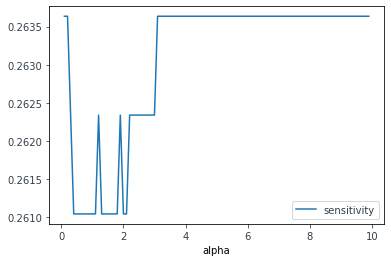

In [205]:
## Lasso Regression Feature Selection
possible_alpha = [i/10 for i in range(1, 100)]
alp_sensi = []

for a in possible_alpha:
    lassolr = LogisticRegression(C=a, penalty='l1', solver='liblinear')
    lassolr.fit(X_train, y_train)
    cp = confusion_matrix(y_test, lassolr.predict(X_test))
    alp_sensi.append({"alpha": a, "sensitivity": cp[1,1]/(cp[1,0]+cp[1,1])})

pd.DataFrame(alp_sensi).plot.line(x='alpha', y='sensitivity')

### From above we can that sensitivity is max at alpha = 3


In [206]:
# Let us run the model with zero coefficient and LASSO penalty L1
lassolr = LogisticRegression(C=3, penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
LR_coefs = dict(zip(X_train.columns, lassolr.coef_[0]))
{k:v for k,v in LR_coefs.items() if v == 0}

{}

In [207]:
# Let us create a model and train it
columns_to_drop = None or []
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)
lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("TEST SCORE",lr.score(X_test,y_test),"TRAIN SCORE",lr.score(X_train,y_train))

TEST SCORE 0.9259218125277654 TRAIN SCORE 0.9243585471509497


In [208]:
# Let us check the summary matrics
x_train = sm.add_constant(X_train)
stat_model = sm.Logit(y_train, X_train).fit_regularized(method='l1')
print(stat_model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.1932687312462582
            Iterations: 165
            Function evaluations: 303
            Gradient evaluations: 165
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                21007
Model:                          Logit   Df Residuals:                    20936
Method:                           MLE   Df Model:                           70
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3449
Time:                        19:45:20   Log-Likelihood:                -4060.0
converged:                       True   LL-Null:                       -6197.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------

In [209]:
# Let us calculate the VIF

vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
for i, var in enumerate(X_train.columns):
    rsq = sm.OLS(X_train[var], X_train.drop([var], axis=1)).fit().rsquared
    vif = round( 1 / (1 - rsq + 0.00000000001), 2)
    vif_df.loc[i] = [var, vif]
    vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
vif_df   

,Var,Vif
0,arpu_8,32.85
1,onnet_mou_8,3162.97
2,offnet_mou_8,3536.13
3,roam_ic_mou_8,2.43
4,roam_og_mou_8,109.04
5,loc_og_t2t_mou_8,707.37
6,loc_og_t2m_mou_8,805.38
7,loc_og_t2f_mou_8,7.15
8,loc_og_t2c_mou_8,1.67
9,std_og_t2t_mou_8,2163.66


In [210]:
cols_to_drop=["arpu_8","arpu_good_ph","ic_others_8","ic_others_good_ph","isd_ic_mou_8","isd_ic_mou_good_ph","isd_og_mou_8","isd_og_mou_good_ph","loc_ic_t2f_mou_good_ph","loc_ic_t2m_mou_good_ph","loc_ic_t2t_mou_good_ph","loc_og_t2c_mou_8","loc_og_t2c_mou_good_ph","loc_og_t2f_mou_8","loc_og_t2f_mou_8","loc_og_t2f_mou_good_ph","loc_og_t2m_mou_8","loc_og_t2m_mou_good_ph","loc_og_t2t_mou_8","max_rech_amt_8","max_rech_data_8","max_rech_data_good_ph","monthly_3g_good_ph","offnet_mou_8","og_others_8","onnet_mou_8","roam_ic_mou_8","roam_ic_mou_good_ph","roam_og_mou_8","spl_ic_mou_good_ph","spl_og_mou_8","spl_og_mou_good_ph","std_ic_t2f_mou_8","std_ic_t2f_mou_good_ph","std_ic_t2m_mou_good_ph","std_og_t2f_mou_8","std_og_t2f_mou_good_ph","std_og_t2t_mou_good_ph","total_rech_amt_8","total_rech_num_good_ph","vbc_3g_8","vbc_3g_good_ph","vol_2g_mb_good_ph","vol_3g_mb_8","vol_3g_mb_good_ph"]


features = list(set(X_train.columns) - set(cols_to_drop))
features

['sachet_3g_good_ph',
 'total_rech_num_8',
 'last_day_rch_amt_good_ph',
 'loc_og_t2t_mou_good_ph',
 'std_ic_t2t_mou_good_ph',
 'spl_ic_mou_8',
 'monthly_2g_good_ph',
 'total_rech_for_data_8',
 'og_others_good_ph',
 'last_day_rch_amt_8',
 'sachet_3g_8',
 'std_ic_t2m_mou_8',
 'std_og_t2m_mou_8',
 'sachet_2g_8',
 'loc_ic_t2t_mou_8',
 'sachet_2g_good_ph',
 'std_og_t2m_mou_good_ph',
 'loc_ic_t2f_mou_8',
 'monthly_3g_8',
 'monthly_2g_8',
 'std_ic_t2t_mou_8',
 'roam_og_mou_good_ph',
 'aon',
 'vol_2g_mb_8',
 'day_of_last_rech_shift',
 'std_og_t2t_mou_8',
 'loc_ic_t2m_mou_8']

In [211]:
# Now run the model again with the coluns to be dropped values
columns_to_drop = cols_to_drop
X_train = X_train.drop(columns_to_drop, axis=1)
X_test = X_test.drop(columns_to_drop, axis=1)
lr = LogisticRegression(C=4.0, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("TEST SCORE",lr.score(X_test,y_test),"TRAIN SCORE",lr.score(X_train,y_train))

TEST SCORE 0.9244780097734341 TRAIN SCORE 0.9220735945161137


In [212]:
# Let us check the summary matrics
x_train = sm.add_constant(X_train)
stat_model = sm.Logit(y_train, X_train).fit_regularized(method='l1')
print(stat_model.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.19938574381604574
            Iterations: 95
            Function evaluations: 146
            Gradient evaluations: 95
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                21007
Model:                          Logit   Df Residuals:                    20980
Method:                           MLE   Df Model:                           26
Date:                Mon, 31 Aug 2020   Pseudo R-squ.:                  0.3242
Time:                        19:45:29   Log-Likelihood:                -4188.5
converged:                       True   LL-Null:                       -6197.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [213]:
vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
for i, var in enumerate(X_train.columns):
    rsq = sm.OLS(X_train[var], X_train.drop([var], axis=1)).fit().rsquared
    vif = round( 1 / (1 - rsq + 0.00000000001), 2)
    vif_df.loc[i] = [var, vif]
    vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)
vif_df  

,Var,Vif
0,std_og_t2t_mou_8,1.39
1,std_og_t2m_mou_8,2.50
2,loc_ic_t2t_mou_8,1.33
3,loc_ic_t2m_mou_8,1.75
4,loc_ic_t2f_mou_8,1.20
5,std_ic_t2t_mou_8,1.88
6,std_ic_t2m_mou_8,1.16
7,spl_ic_mou_8,1.09
8,total_rech_num_8,2.69
9,last_day_rch_amt_8,1.73


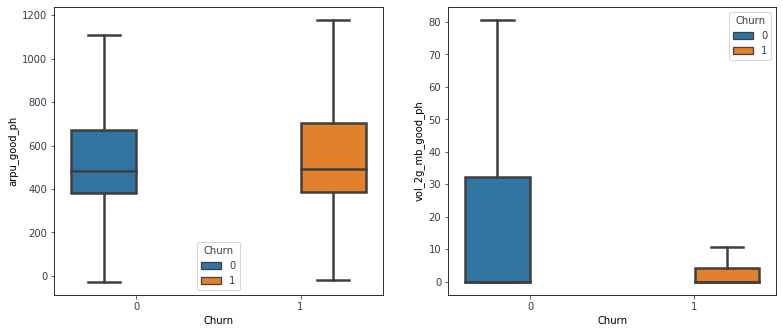

In [214]:
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(data=telecom_churn, y="arpu_good_ph", x="Churn", hue="Churn", linewidth=2.5, showfliers=False)
plt.subplot(3,3,2)
sns.boxplot(data=telecom_churn, y="vol_2g_mb_good_ph", x="Churn", hue="Churn", linewidth=2.5, showfliers=False)
plt.show()

#### Observation: Some good phase indicators that lowers the posibility of churn when it is increased


age on network: : [aon] : The chance of churn decreases when age on network increases.

average revenue per user : [arpu_good_ph] : When the average revenue for customer is high in good phase then there is a less likelihood of the customer being default.

volume of 2G data usage: [vol_2g_mb_good_ph] : When volumn of 2G data increases in good phase the chances of the churn becomes less.




#### Observation: Some action phase (Aug) indicators: 


loc_ic_t2f_mou_8: local incoming calls from fixed line: a drop in calls from fixed line to customer is also highly suggestive of churn.

roam_og_mou_8: A customer may churn when increase in roaming outgoing call increases as there is possibility of increase in his expense and he might look for some local network
    
max_rech_data_8: If Max recharge data decreases than that indicates that the customer may fall into default.

vol_2g_mb_8/sachet_2g_8: A drop in 2G volumn and small top up is indicative of churn.
    
loc_og_t2m_mou_8: high possibility of customer churn is local outgoing calls from telecom operator to other network mobile.
    
loc_ic_t2t_mou_8: if the local incoming calls for t2t drop in action phase then there are high chances of default.

#### Also we saw from exploratory data analysis that customer witj 2G network has higher percentage of churn rate than 3G network



## Recommendation:

So we can conclude the below points to reduce the Churn rate of customers based on modelling and EDA


1. 3G network : Expansion of 3G network where 3G is currently not available.


2. Lower roaming charges: Roaming charges needs to be lowered in order to retain the customers as customers seek for other network to minimise their cost.

    
3. Data ussage tariff: Tariff of data uses needs to be lowered. 

    
4. Offers for privilege customers: Customers who are loyal to the network should be awared with loyality in terms of offers.

    
5. pre paid offer: customers should be offered pre paid offer depending on where customer minutes of usage (mou) are higher (outgoing/std/t2t/t2m etc).    